# Introduction
## Rationale for the project : 

##### The project aims to analyze Ultimate Fighting Championship(UFC) fighters performance metrics and physical attributes to uncover patterns that contribute to success in mixed martial arts (MMA). By looking at their physical attributes and fight performance, I want to see if things like height, weight, or striking accuracy can predict how well a fighter does in the octagon. This could help improve training and strategies for fighters. This analysis could benefit athletes, trainers, and fans by improving strategies and understanding the sport.

### <u>Research Question</u>:

#### 1. What factors most significantly influence a UFC fighter's win ratio, and how accurately can we predict win ratios using regression models based on available fighter data?

### Motivation :

##### I chose this topic because UFC is a popular sport, and many people are curious about what makes a fighter good. I’ve always been interested in MMA and UFC statistics and wanted to see if I could use data to answer real-world questions about how fighters perform in their matches.

### Significance :

##### This project is important because it can help athletes, trainers, and fans better understand what influences success in UFC fights and generally in MMA. It could lead to better training methods for fighters and a deeper understanding of how different physical and skill attributes impact fight outcomes, benefiting everyone involved in the sport.

## Information about the Dataset : 

##### 1. The dataset contains detailed information about UFC fighters, including their fight records (wins, losses, draws), physical attributes (height, weight, reach), and performance metrics (striking, takedowns, submissions). It provides an overview of individual fighters' abilities and outcomes in the octagon.

##### 2. The data has been compiled from public UFC records, official fight statistics, and fighter profiles on platforms like UFC’s website, FightMetric, and MMA databases. These sources typically track fighters’ performance over their careers.

## Characterstics :

##### 1. Performance Metrics: Data on striking accuracy, takedown success, and submissions attempted give insights into fighting styles.

##### 2. Physical Attributes: Detailed information on height, weight, and reach allows for studying correlations between body type and performance.

##### 3. Fighting Outcomes: The win and loss records of fighters highlights overall success in competitive fights.

## Limitations :

##### 1. Data Gaps: Some fighters might have incomplete records, especially for older fights or less-known competitors.

##### 2. Bias: The dataset might over-represent popular or highly active fighters.

##### 3. Context: It lacks qualitative factors like coaching, fight camps, or injuries, which also affect performance.

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV , validation_curve, learning_curve 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFECV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import plot_tree
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
data = pd.read_csv(r"C:\Users\roger\Downloads\Mohd_Kaif_ufc_fighters_statistics_Dataset.csv")
data.head()

name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                                   0.00                            0.0   
3                                   1.40                           33.0   
4                                   2.05                           60.0   

   significant_strikes_absorbed_per_minute  significant_strike_defence  \
0                                     0.00                         0.0   
1                                     0.00                         0.0   
2                                     5.58                        60.0   
3                                     1.40                        75.0   
4                                     2.73                        42.0   

   average_takedowns_landed_per_15_minutes  takedown_accuracy  \
0                                     7.32              100.0   
1                                     0.00                0.0   
2                                     0.00                0.0   
3                                     0.00                0.0   
4                                    10.23              100.0   

   takedown_defense  average_submissions_attempted_per_15_minutes  
0               0.0                                          21.9  
1             100.0                                          21.6  
2               0.0                                          20.9  
3             100.0                                          20.9  
4               0.0                                          20.4

In [3]:
warnings.filterwarnings("ignore")

# Data Exploration and Cleaning

In [4]:
data.shape

(4111, 18)

In [5]:
data.describe()

wins       losses        draws    height_cm  weight_in_kg  \
count  4111.000000  4111.000000  4111.000000  3813.000000   4024.000000   
mean     12.366821     5.726344     0.264413   178.234325     77.395825   
std       9.374667     5.103768     0.822373     8.888050     17.982242   
min       0.000000     0.000000     0.000000   152.400000     47.630000   
25%       7.000000     2.000000     0.000000   172.720000     65.770000   
50%      11.000000     5.000000     0.000000   177.800000     77.110000   
75%      17.000000     8.000000     0.000000   185.420000     83.910000   
max     253.000000    83.000000    11.000000   226.060000    349.270000   

       reach_in_cm  significant_strikes_landed_per_minute  \
count  2184.000000                            4111.000000   
mean    181.808874                               2.437516   
std      10.680804                               1.990903   
min     147.320000                               0.000000   
25%     175.260000                               0.830000   
50%     182.880000                               2.330000   
75%     190.500000                               3.600000   
max     213.360000                              17.650000   

       significant_striking_accuracy  significant_strikes_absorbed_per_minute  \
count                    4111.000000                              4111.000000   
mean                       35.542447                                 3.145206   
std                        20.398502                                 2.848502   
min                         0.000000                                 0.000000   
25%                        27.000000                                 1.550000   
50%                        40.000000                                 2.940000   
75%                        49.000000                                 4.230000   
max                       100.000000                                52.500000   

       significant_strike_defence  average_takedowns_landed_per_15_minutes  \
count                 4111.000000                              4111.000000   
mean                    42.643639                                 1.250586   
std                     22.322427                                 1.935716   
min                      0.000000                                 0.000000   
25%                     36.000000                                 0.000000   
50%                     50.000000                                 0.590000   
75%                     58.000000                                 1.940000   
max                    100.000000                                32.140000   

       takedown_accuracy  takedown_defense  \
count        4111.000000       4111.000000   
mean           26.299927         38.958891   
std            28.700980         34.426458   
min             0.000000          0.000000   
25%             0.000000          0.000000   
50%            22.000000         42.000000   
75%            45.000000         66.000000   
max           100.000000        100.000000   

       average_submissions_attempted_per_15_minutes  
count                                   4111.000000  
mean                                       0.610095  
std                                        1.505924  
min                                        0.000000  
25%                                        0.000000  
50%                                        0.000000  
75%                                        0.700000  
max                                       21.900000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [7]:
columns = ['name', 'nickname', 'wins', 'losses', 'draws', 'height cm',
       'weight in kg', 'reach in cm', 'stance', 'date of birth',
       'significant strikes landed per minute',
       'significant striking accuracy',
       'significant strikes absorbed per minute', 'significant strike defence',
       'average takedowns landed per 15 minutes', 'takedown accuracy',
       'takedown defense', 'average submissions attempted per 15 minutes']
data.columns = columns

In [8]:
new_data = data.copy()
new_data.insert(18, "win ratio", new_data['wins']/(new_data['wins'] + new_data['losses']+ new_data['draws']))

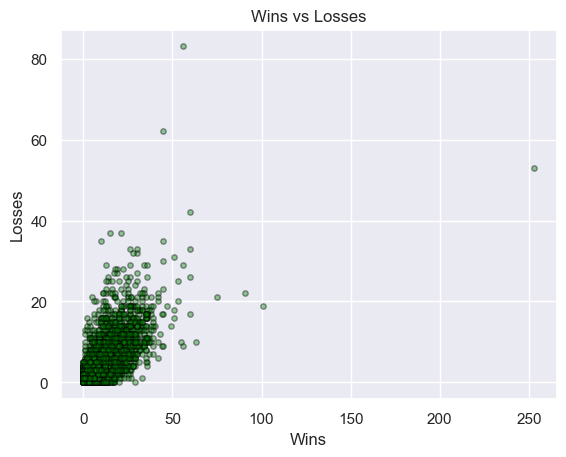

In [9]:
plt.scatter(x = new_data['wins'], y = new_data['losses'], s = 15, facecolor = "green", alpha = 0.4, linewidth = 1, color = "black")
plt.xlabel('Wins')
plt.ylabel('Losses')
plt.title("Wins vs Losses")
plt.show()

#### The above graph shows positive correlation between wins and losses.

In [10]:
new_data.drop(columns = ['name', 'nickname', 'wins', 'losses', 'draws', 'stance', 'date of birth'], inplace = True)
for column in new_data.columns :
    q1 = new_data[column].quantile(0.25)
    q3 = new_data[column].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    new_data = new_data[(new_data[column] >= lower_bound) & (new_data[column] <= upper_bound)]
new_data.shape

(1572, 12)

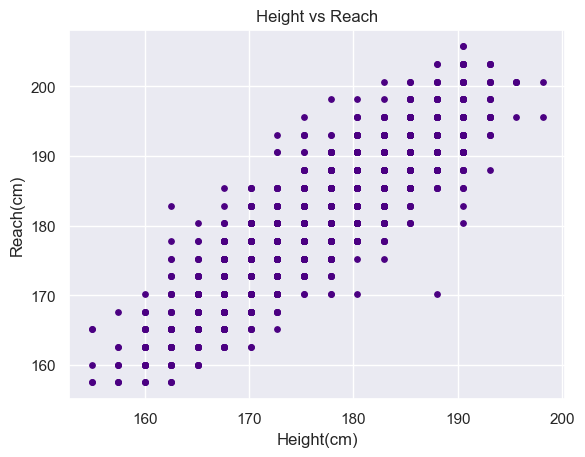

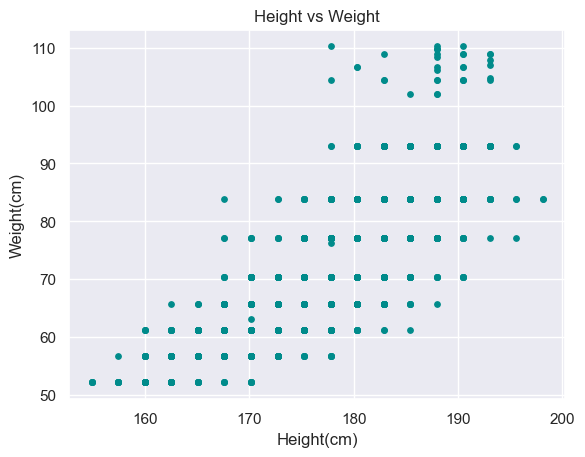

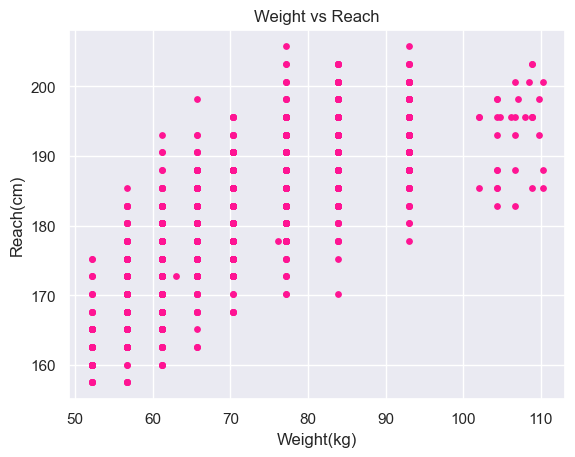

In [11]:
plt.scatter(x = new_data['height cm'], y = new_data['reach in cm'], s = 15, color = "indigo")
plt.xlabel('Height(cm)')
plt.ylabel('Reach(cm)')
plt.title("Height vs Reach")
plt.show()
plt.scatter(x = new_data['height cm'], y = new_data['weight in kg'], s = 15, color = "darkcyan")
plt.xlabel('Height(cm)')
plt.ylabel('Weight(cm)')
plt.title("Height vs Weight")
plt.show()
plt.scatter(x = new_data['weight in kg'], y = new_data['reach in cm'], s = 15, color = "deeppink")
plt.xlabel('Weight(kg)')
plt.ylabel('Reach(cm)')
plt.title("Weight vs Reach")
plt.show()

#### The above graph shows positive correlation between the features taken.

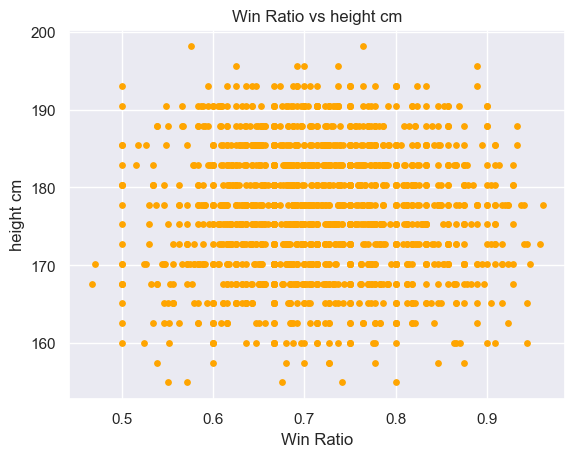

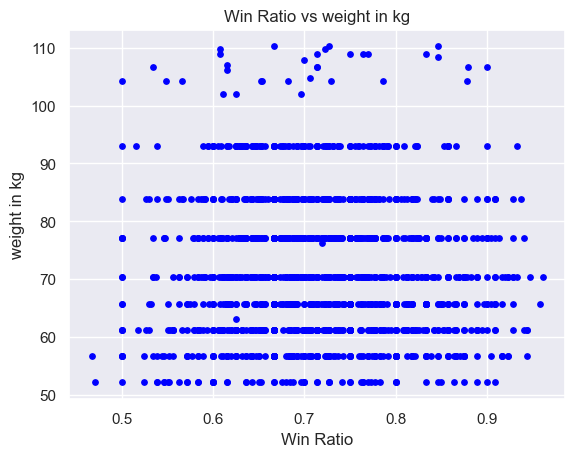

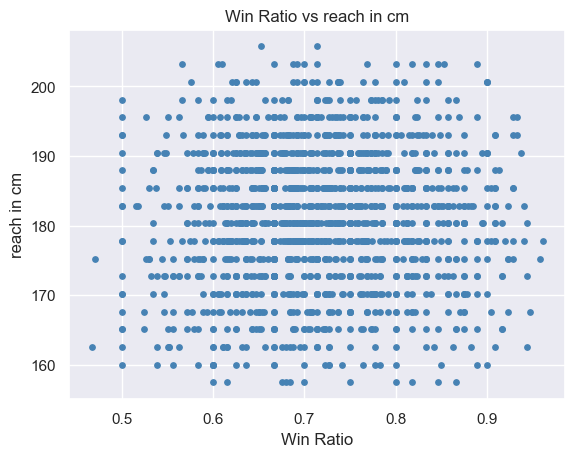

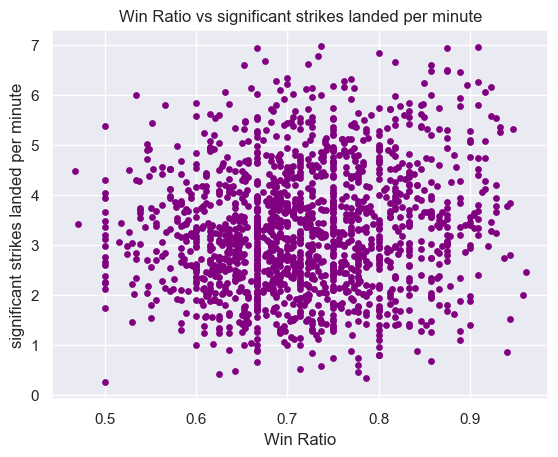

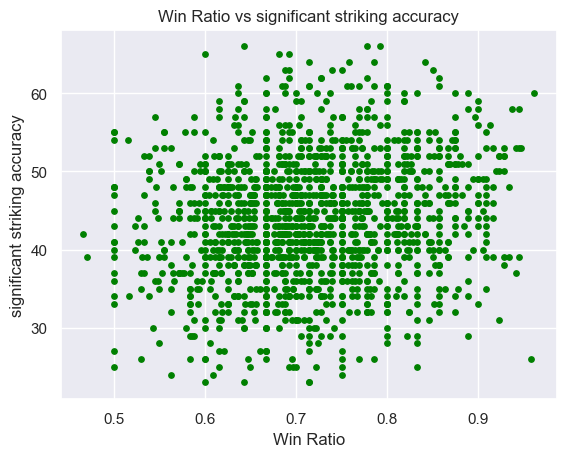

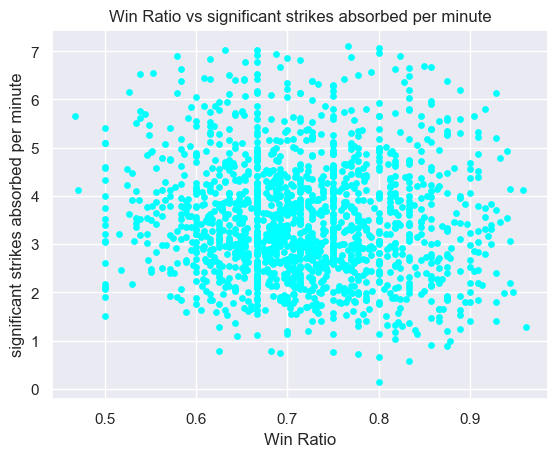

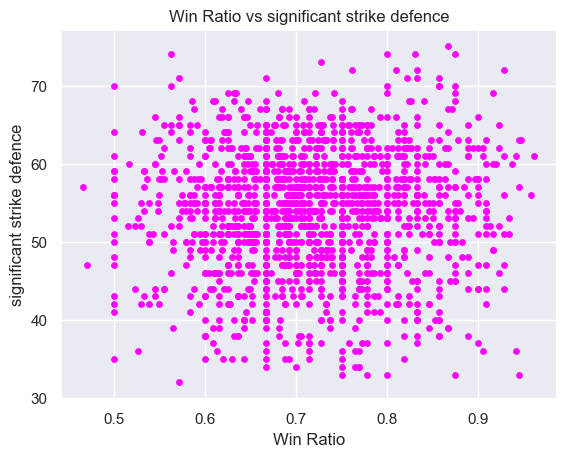

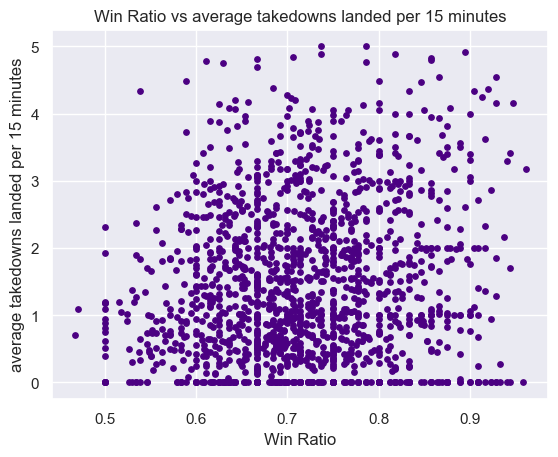

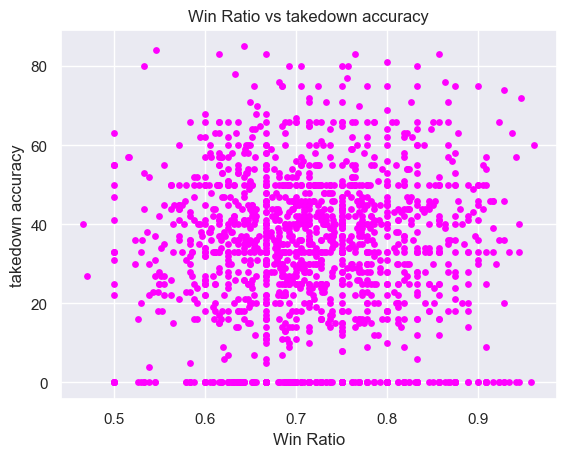

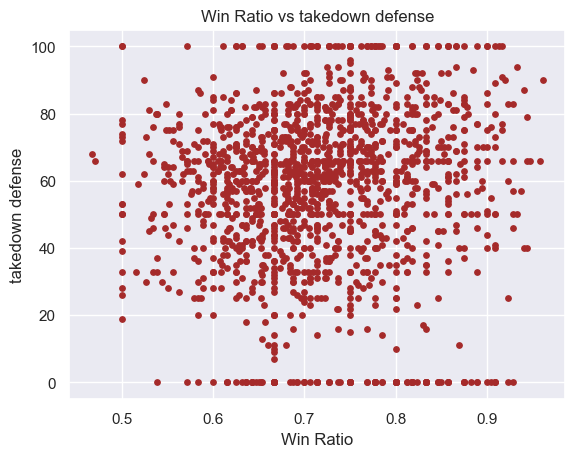

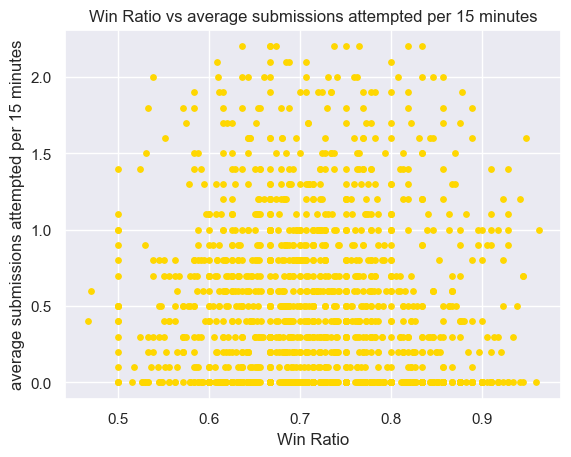

In [12]:
# This code is to check the correlation between win ratio and other features
color = ['orange', 'blue', 'steelblue', 'purple', 'green', 'cyan', 'magenta', 'indigo', 'magenta', 'brown', 'gold']
X = new_data.drop(columns = ['win ratio'])
for i, column in zip(color, X) :
    plt.scatter(x = new_data['win ratio'], y = X[column], s = 15, color = i)
    plt.xlabel('Win Ratio')
    plt.ylabel("{0}".format(column))
    plt.title("Win Ratio vs {0}".format(column))
    plt.show()

#### By looking at the plots it could be concluded that there isn't any significant correlation between the win ratio and any other column of the data 

In [13]:
data.isnull().sum()

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height cm                                        298
weight in kg                                      87
reach in cm                                     1927
stance                                           823
date of birth                                   1135
significant strikes landed per minute              0
significant striking accuracy                      0
significant strikes absorbed per minute            0
significant strike defence                         0
average takedowns landed per 15 minutes            0
takedown accuracy                                  0
takedown defense                                   0
average submissions attempted per 15 minutes       0
dtype: int64

In [14]:
skewness_height = data['height cm'].skew()
kurtosis_height = data['height cm'].kurtosis()
print("Skewness of height is : ", skewness_height, "\nkurtosis of height is : ", kurtosis_height)

Skewness of height is :  0.03340186559971217 
kurtosis of height is :  0.09975845781246928


<Axes: xlabel='height cm', ylabel='Count'>

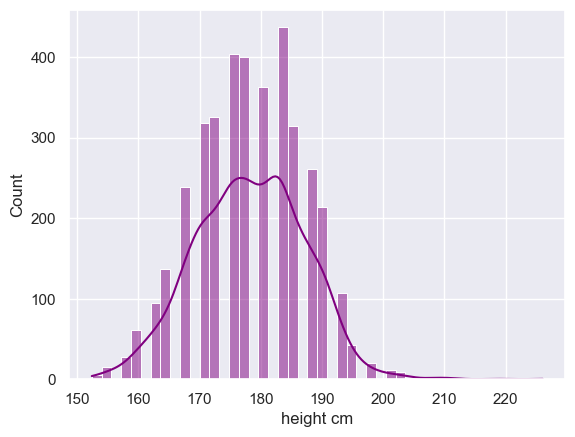

In [15]:
sns.histplot(data['height cm'], kde = True, color = "purple")

#### The value of Skewness, 0.0334 which is close to 0 suggests that the height data is almost normally distributed and the value of Kurtosis, which is 0.09975 suggest that the height data has a very light tails, which means the data does not contain extreme outliers, and it is relatively similar to normal distribution. and to verify all this the above drawn Histogram suggests that the data is actually very close to a normal distribution.

#### Since the height data is very close to normal distribution i can fill the NaN values in the data with mean.

In [16]:
mean_height = data['height cm'].mean()
data['height cm'].fillna(mean_height, inplace = True)

In [17]:
data.isnull().sum()

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height cm                                          0
weight in kg                                      87
reach in cm                                     1927
stance                                           823
date of birth                                   1135
significant strikes landed per minute              0
significant striking accuracy                      0
significant strikes absorbed per minute            0
significant strike defence                         0
average takedowns landed per 15 minutes            0
takedown accuracy                                  0
takedown defense                                   0
average submissions attempted per 15 minutes       0
dtype: int64

In [18]:
skewness_weight = data['weight in kg'].skew()
kurtosis_weight = data['weight in kg'].kurtosis()
print("Skewness of weight is : ", skewness_weight, "\nkurtosis of weight is : ", kurtosis_weight)

Skewness of weight is :  2.054138278308083 
kurtosis of weight is :  15.304654176736921


<Axes: xlabel='weight in kg', ylabel='Count'>

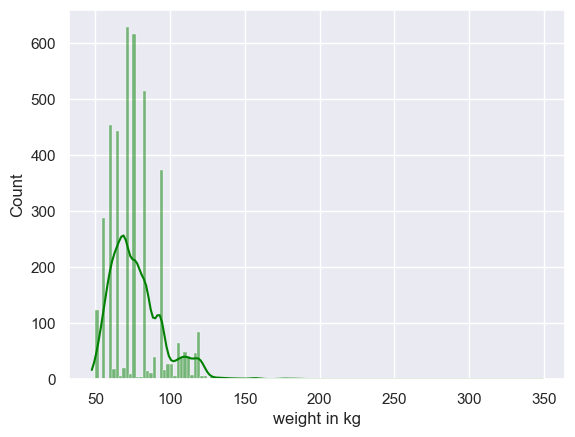

In [19]:
sns.histplot(data['weight in kg'], kde = True, color = "green")

#### Since the skewness of the weight column is 2.0541 which indicates that data is right skewed(Positively Skewed). Whereas Kurtosis has a value of 15.25726 indicates that the data has heavy tails and a sharp peak (leptokurtic). This means there are some extreme values in the data (outliers) that make the distribution much more peaked than a normal distribution.

In [20]:
q1 = data['weight in kg'].quantile(0.25)
q3 = data['weight in kg'].quantile(0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
data = data[(data['weight in kg'] >= lower_bound) & (data['weight in kg'] <= upper_bound)]

<Axes: xlabel='weight in kg', ylabel='Count'>

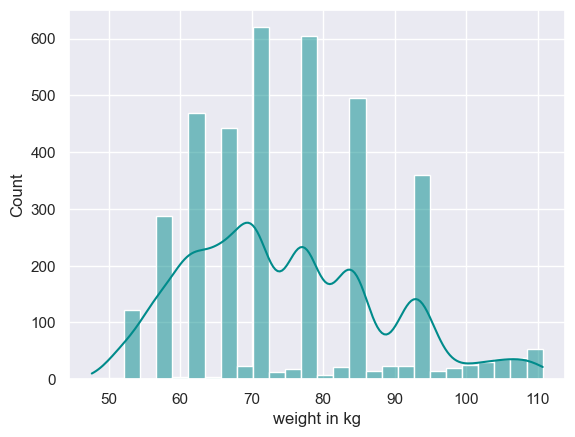

In [21]:
sns.histplot(data['weight in kg'], kde = True, color = "darkcyan")

#### Since the data now has no outlier and now we can fill the missing weight column values using median

In [22]:
data['weight in kg'].fillna(data['weight in kg'].median(), inplace = True)

In [23]:
reach_skewness = data['reach in cm'].skew()
reach_kurtosis = data['reach in cm'].kurtosis()
print("Skewness of reach is : ", reach_skewness, "\nkurtosis of reach is : ", reach_kurtosis)

Skewness of reach is :  -0.15592618396981853 
kurtosis of reach is :  -0.20307241722189406


In [24]:
data.shape

(3773, 18)

<Axes: xlabel='reach in cm', ylabel='Count'>

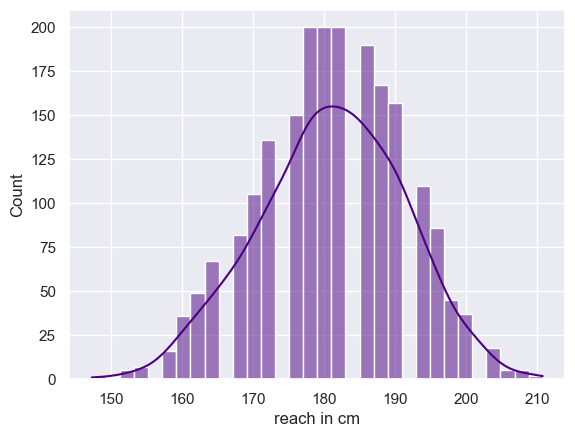

In [25]:
sns.histplot(data['reach in cm'], kde = True, color = "indigo")

#### Since the Skewness of Reach column of the data is -0.1560, which is very close to 0 which means that the data is very close tpo normal distribution and the histogram made above also suggests the same. And the value of Kutosis is -0.2030 This suggests that the distribution of the reach values is slightly platykurtic, meaning it has flatter peaks than a normal distribution, with fewer extreme values (outliers).

#### But there are almost 50% of the values which are NULL so using mean wouldn't be a good idea. Instead continuing with regression is much better to predict the missing values.

In [26]:
data.head()

name    nickname  wins  losses  draws  height cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight in kg  reach in cm    stance date of birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant strikes landed per minute  significant striking accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                                   0.00                            0.0   
3                                   1.40                           33.0   
4                                   2.05                           60.0   

   significant strikes absorbed per minute  significant strike defence  \
0                                     0.00                         0.0   
1                                     0.00                         0.0   
2                                     5.58                        60.0   
3                                     1.40                        75.0   
4                                     2.73                        42.0   

   average takedowns landed per 15 minutes  takedown accuracy  \
0                                     7.32              100.0   
1                                     0.00                0.0   
2                                     0.00                0.0   
3                                     0.00                0.0   
4                                    10.23              100.0   

   takedown defense  average submissions attempted per 15 minutes  
0               0.0                                          21.9  
1             100.0                                          21.6  
2               0.0                                          20.9  
3             100.0                                          20.9  
4               0.0                                          20.4

# Linear Regression for "Reach"

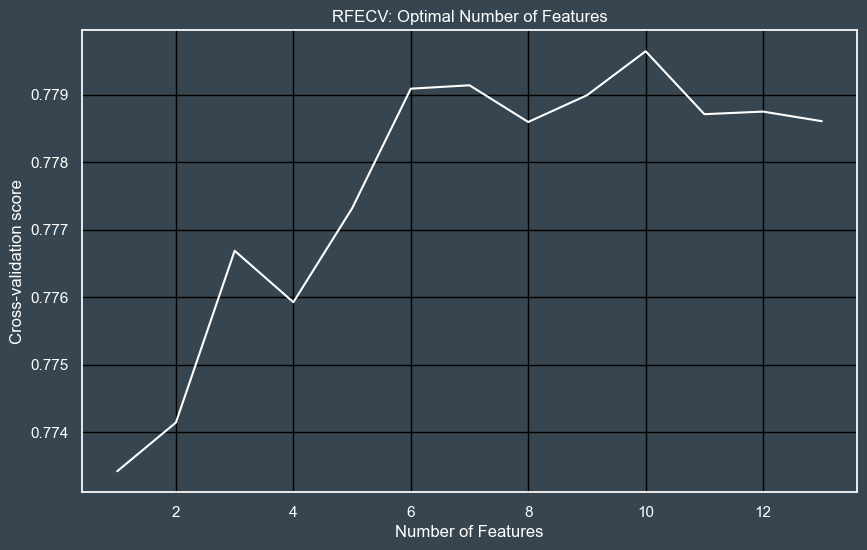

In [27]:
# Since about 50% of reach data is missing so i am using regression to predict the values and fill in the right spot
syn_data = data.copy()
syn_data = syn_data.drop(columns = ['name', 'nickname', 'stance', 'date of birth'])
syn_data = syn_data.dropna(subset = ['reach in cm'])
b = syn_data['reach in cm']
a = syn_data.drop(columns = ['reach in cm'])
train_a, test_a, train_b, test_b = train_test_split(a, b, test_size = 0.30, random_state = 40)
linear = LinearRegression()
cv_reach = RFECV(estimator = linear, step = 1, cv = 3)
cv_reach.fit(train_a, train_b)
col = a.columns[cv_reach.support_]
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#36454F')
plt.gca().set_facecolor('#36454F') 
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.plot(range(1, len(cv_reach.cv_results_['mean_test_score']) + 1), cv_reach.cv_results_['mean_test_score'], color = "white")
plt.grid(color = "black")
plt.xlabel('Number of Features', color = "white")
plt.ylabel('Cross-validation score', color = "white")
plt.title('RFECV: Optimal Number of Features', color = "white")
plt.show()

#### The above graph shows that Linear Regression performs best on unseen data with 10 features as it has the highest cross-validation score of greater than 0.779.

In [28]:
train_a1, test_a1, train_b1, test_b1 = train_test_split(a[col], b, test_size = 0.25, random_state = 42)
scaling = StandardScaler()
scaled_train_a1 = scaling.fit_transform(train_a1)
scaled_test_a1 = scaling.fit_transform(test_a1)
linearreg = LinearRegression()
linearreg.fit(scaled_train_a1, train_b1)
pred_b1 = linearreg.predict(scaled_test_a1)
mse_reach = mean_squared_error(test_b1, pred_b1)
r2_reach = r2_score(test_b1, pred_b1)
print("mse : ", mse_reach, "\nR-Squared : ", r2_reach)

mse :  25.283214778945045 
R-Squared :  0.7719406670432434


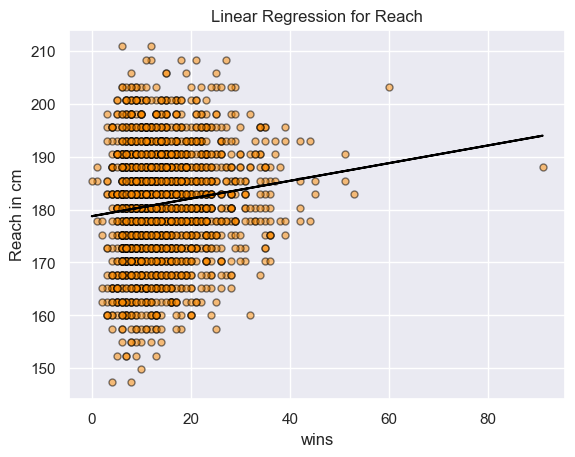

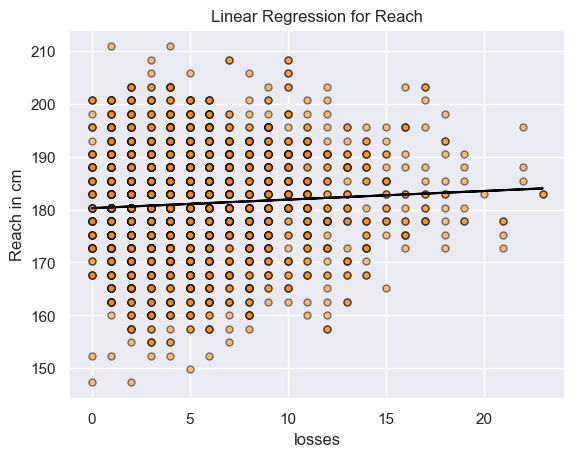

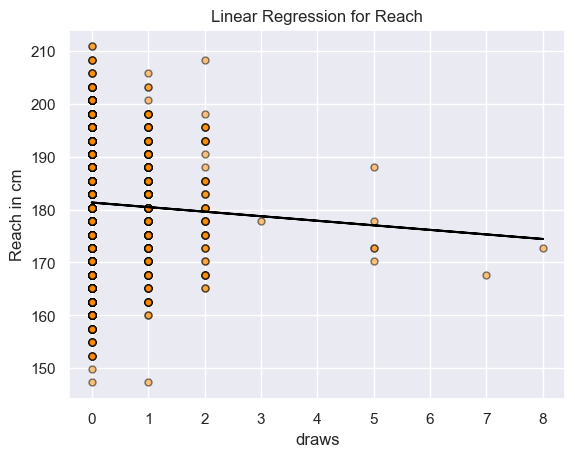

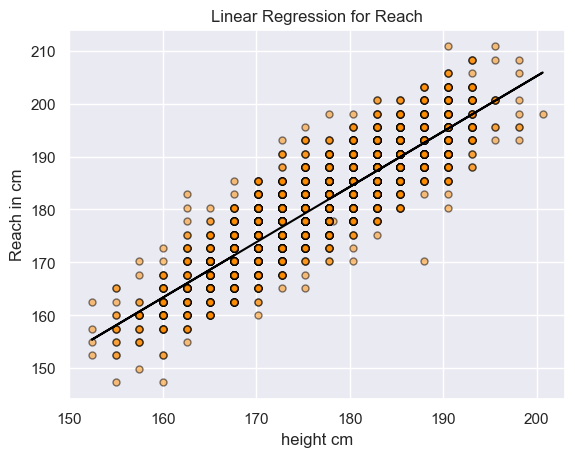

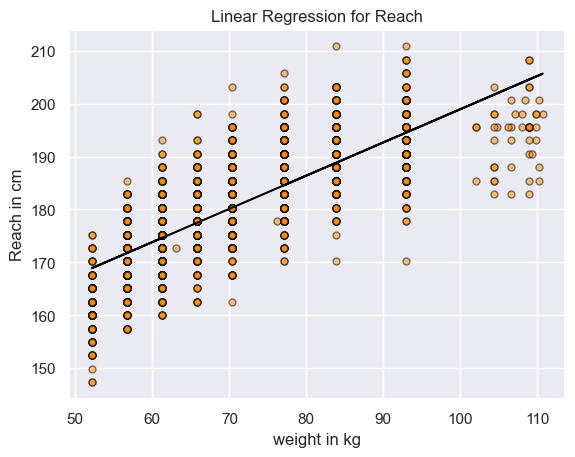

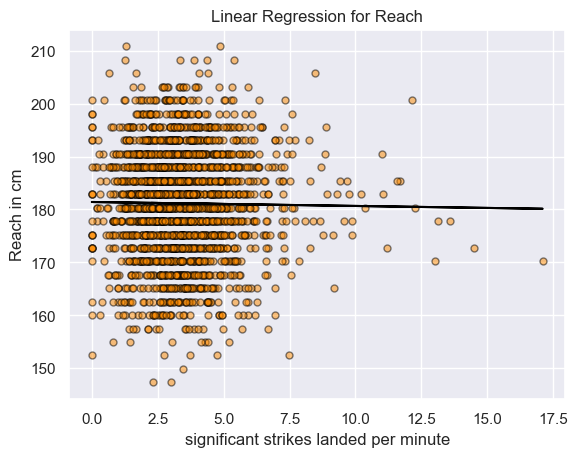

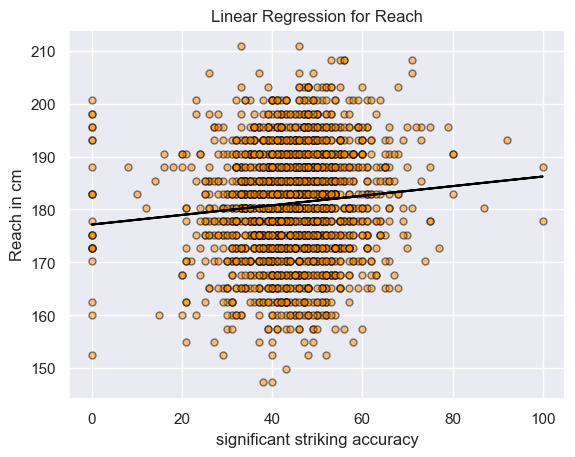

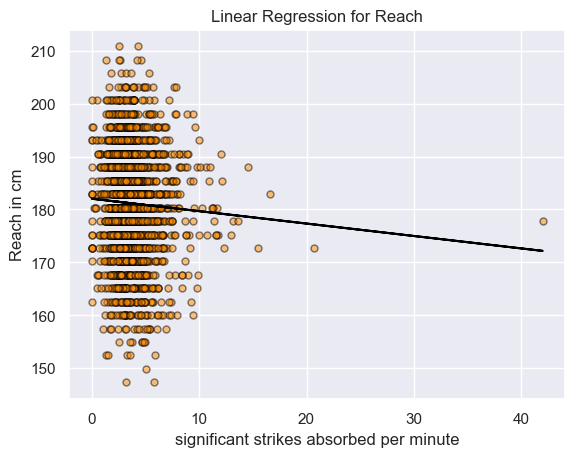

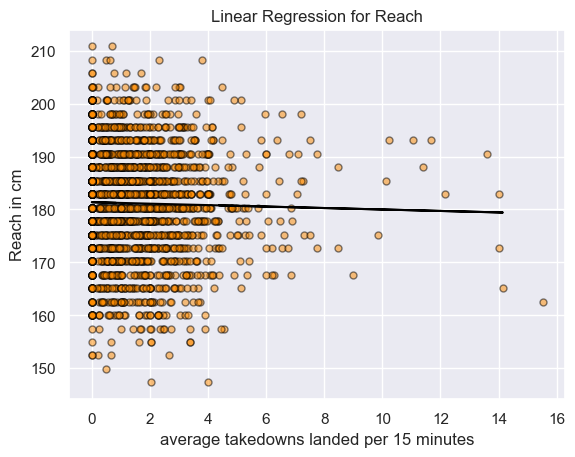

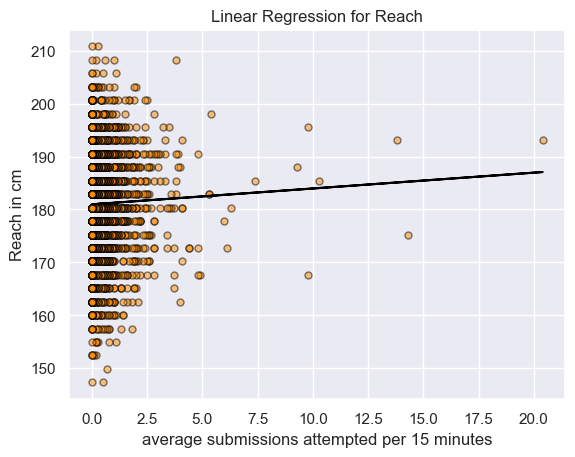

In [29]:
# This code plots the regression line to show which feature contributing more to the prediction of reach
for column in a.columns[cv_reach.support_]:
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(a[column].values[:, np.newaxis])
    x = scaler.transform(train_a1[column].values[:, np.newaxis])
    linearreg.fit(x, train_b1.values)
    plt.scatter(a[column].values, b.values, facecolor = "darkorange", s = 25, alpha = 0.5, color = "black", linewidth = 1)
    plt.plot(train_a1[column].values, linearreg.predict(x), color = "black")
    plt.title("Linear Regression for Reach")
    plt.xlabel(str(column))
    plt.ylabel("Reach in cm")
    plt.show()

#### Out of the above plots Height cm vs Reach and Weight in kg vs Reach shows that that Height and weight have a strong impact on the reach, this indicates a strong relationship between Height and Reach, Weight and Reach. Rest of the plots have a relatively weaker effect on reach suggesting a weaker relationship.

In [30]:
for attr, rank in zip(a.columns, cv_reach.ranking_):
    print(attr, "  -  ", "Rank",rank)

wins   -   Rank 1
losses   -   Rank 1
draws   -   Rank 1
height cm   -   Rank 1
weight in kg   -   Rank 1
significant strikes landed per minute   -   Rank 1
significant striking accuracy   -   Rank 1
significant strikes absorbed per minute   -   Rank 1
significant strike defence   -   Rank 3
average takedowns landed per 15 minutes   -   Rank 1
takedown accuracy   -   Rank 2
takedown defense   -   Rank 4
average submissions attempted per 15 minutes   -   Rank 1


# Random Forest Regression for "Reach"

In [31]:
rfr = RandomForestRegressor(random_state = 42)
par_grid = {'n_estimators' : [10, 20, 50, 100, 200]}
Grid = GridSearchCV(estimator = rfr, param_grid = par_grid)
Grid.fit(train_a, train_b)
Grid.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=42)

In [32]:
Final = Grid.best_estimator_
imprt = pd.DataFrame(columns = ['Column', 'Feature importance'])
feature = Final.feature_importances_
for column, importance in zip(train_a.columns, feature):
    imprt = pd.concat([imprt, pd.DataFrame({'Column' : [column], "Feature importance" : [importance]})])
imprt['Feature importance'] = imprt['Feature importance'].sort_values(ascending = False)
imprt = imprt.set_index(imprt['Column'])
imprt = imprt.drop(columns = ['Column'])
imprt

Feature importance
Column                                                          
wins                                                    0.773123
losses                                                  0.025735
draws                                                   0.025038
height cm                                               0.023836
weight in kg                                            0.022749
significant strikes landed per minute                   0.020594
significant striking accuracy                           0.019837
significant strikes absorbed per minute                 0.018980
significant strike defence                              0.018429
average takedowns landed per 15 minutes                 0.017622
takedown accuracy                                       0.017238
takedown defense                                        0.011976
average submissions attempted per 15 minutes            0.004842

In [33]:
pred_reach = Final.predict(test_a)
mse_r = mean_squared_error(test_b, pred_reach)
r2_r = r2_score(test_b, pred_reach)
print("mse : ", mse_r, "\nR-Squared : ", r2_r)

mse :  24.24719070113764 
R-Squared :  0.7694844328159327


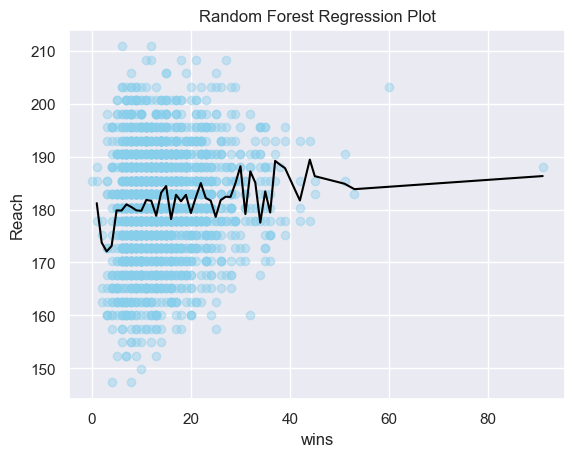

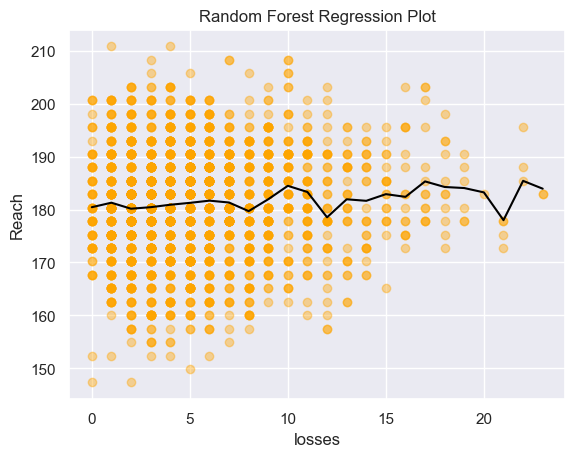

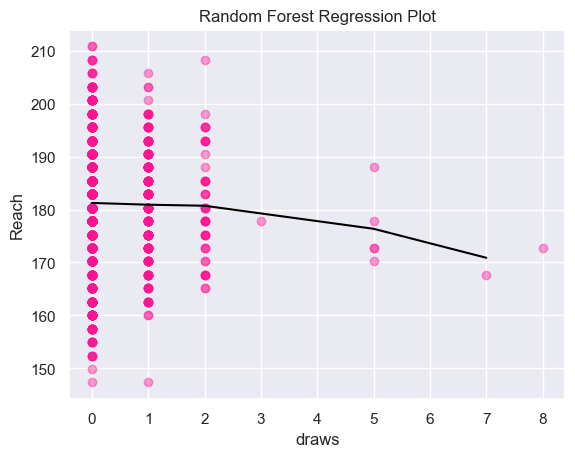

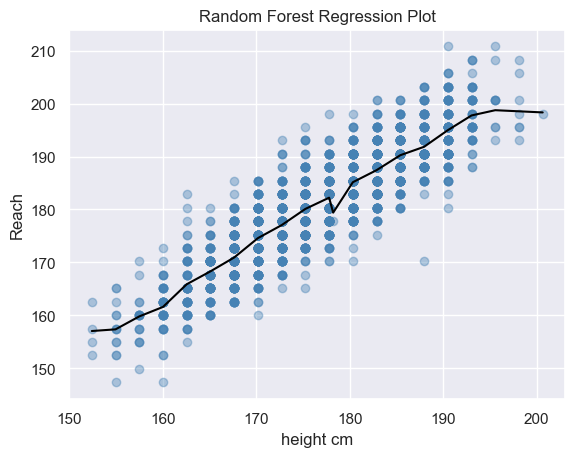

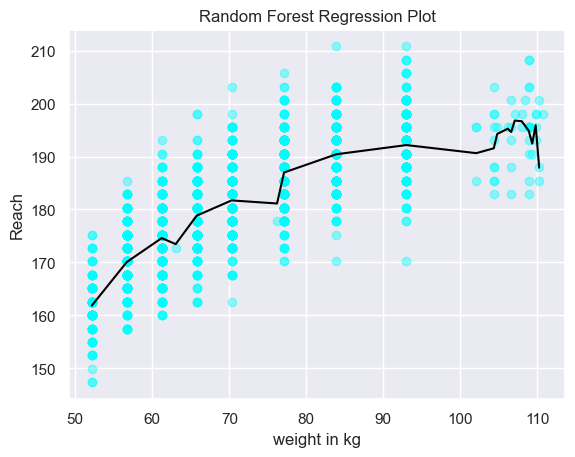

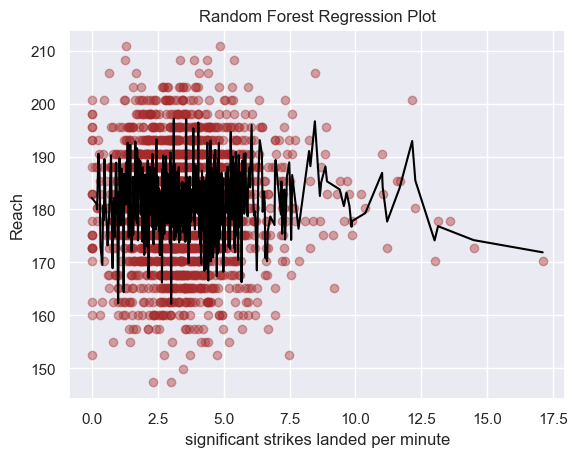

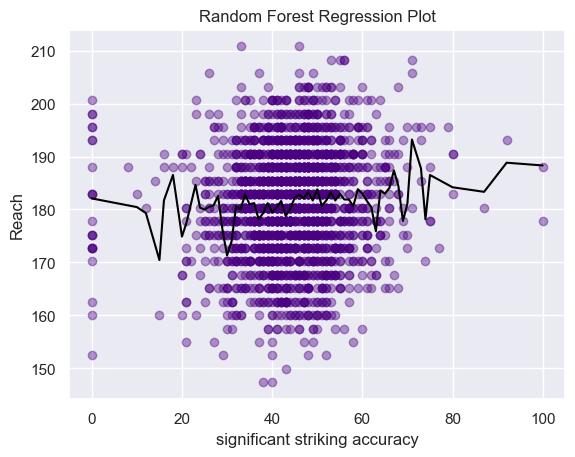

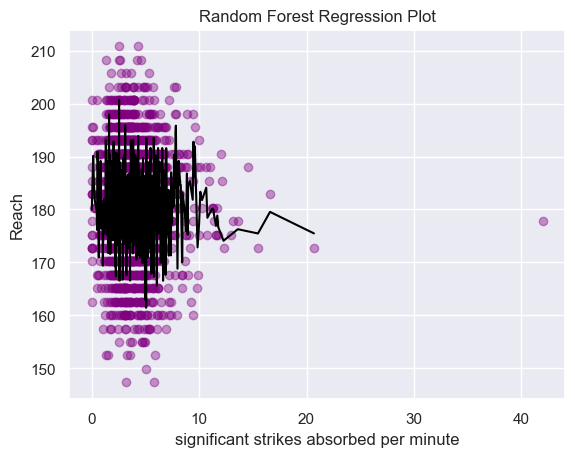

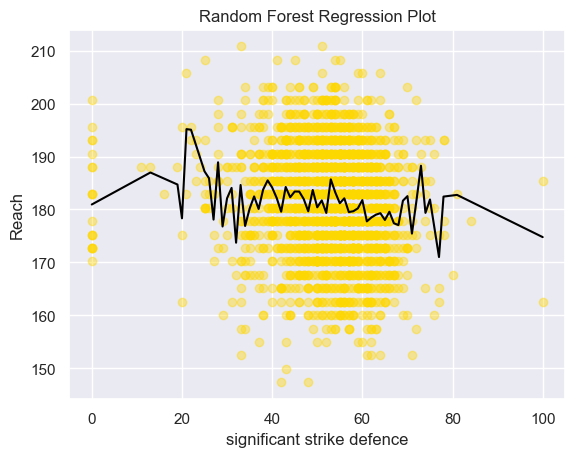

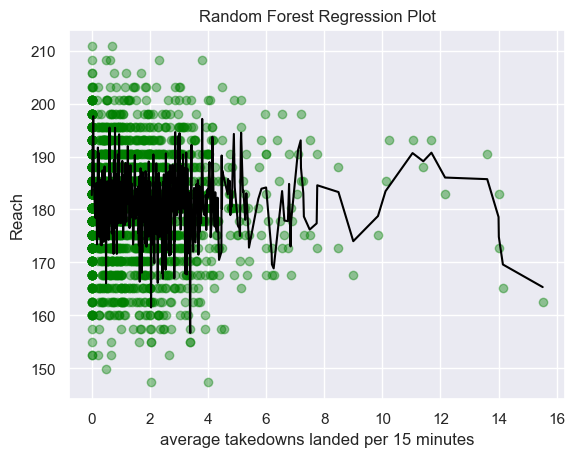

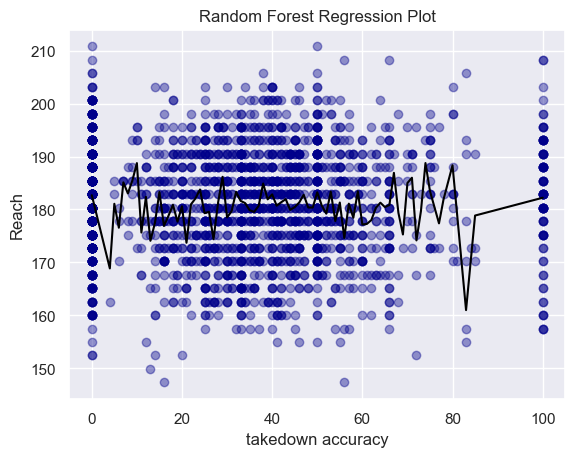

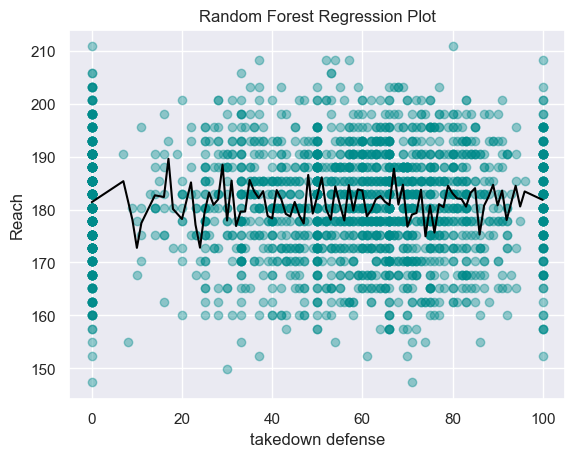

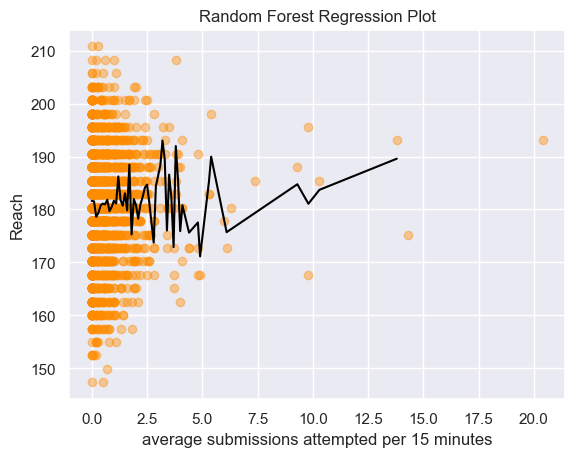

In [34]:
color_point = ["darkorange", "darkcyan", "darkblue", "green", "gold", "purple", "indigo", "brown", "cyan", "steelblue", "deeppink", "orange", "skyblue"]
color_point.reverse()
for feature, colore in zip(train_a.columns, color_point):
    sorted_x = np.argsort(train_a.loc[:, feature].values, axis = 0)
    column = train_a.loc[:, feature].values[sorted_x]
    sorted_y = train_b.values[sorted_x]
    Final.fit(column[:, np.newaxis], sorted_y)
    pred_y = Final.predict(column[:, np.newaxis])
    plt.scatter(a.loc[:, feature], b, color = colore, alpha = 0.4)
    plt.plot(column, pred_y, color = "black")
    plt.xlabel(str(feature))
    plt.ylabel("Reach")
    plt.title("Random Forest Regression Plot")
    plt.show()

#### The above plots suggest that the features have non-linear relationship with reach, and Random Forest Regression is able to model these complex interactions. The fluctuating patterns(peaks and valleys) suggest that there isn't a simple, continuous trend between the features and Reach.

# Polynomial Regression for "Reach"

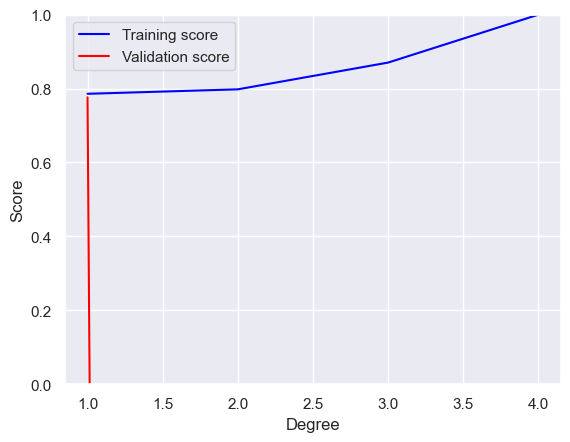

In [35]:
# This code checks if there a polynomial regression with any degree that fits better than linear regression
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
degree = np.arange(1, 5)
training_score, validation_score = validation_curve(estimator = PolynomialRegression(), X = a, y = b, param_name = 'polynomialfeatures__degree', param_range = degree, cv = 3)
plt.plot(degree, np.mean(training_score, 1), color = "blue", label = "Training score")
plt.plot(degree, np.mean(validation_score, 1), color = "red", label = "Validation score")
plt.legend(loc = "best")
plt.ylim(0, 1)
plt.xlabel("Degree")
plt.ylabel("Score")
plt.show()

#### The above plot suggests that using Linear Regression instead of a Polynomial Regression with  degree = 1 is much better.

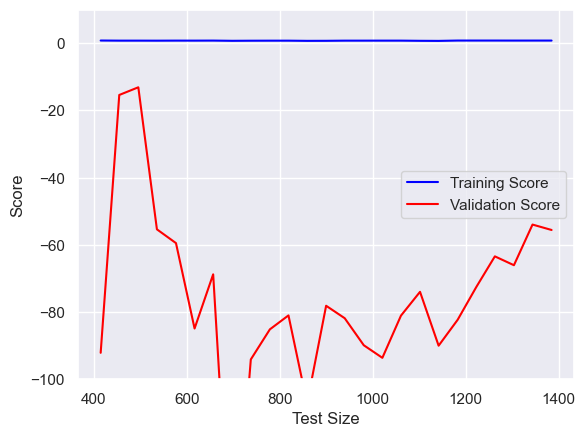

In [36]:
# This code shows how well the well the model fits when the sample size increases
N, training_lc, validation_lc = learning_curve(estimator = PolynomialRegression(), X = a, y = b, train_sizes = np.linspace(0.3, 1, 25), cv = 3)
plt.plot(N, np.mean(training_lc, 1), color = "blue", label = "Training Score")
plt.plot(N, np.mean(validation_lc, 1), color = "red", label = "Validation Score")
plt.legend(loc = "best")
plt.ylim(-100, 10)
plt.xlabel("Test Size")
plt.ylabel("Score")
plt.show()

#### The above graph shows Training score is 1 which suggests that the model is fitting perfectly which often indicates overfitting and the Validation score is always in negative which suggets that the model is performing worst to unseen data. 


#### 1. Getting slightly better result as Linear Regression after performing Random Forest Regression. So predicting the values with a Linear Regression is much more simple and easy to interpret.
#### 2. Linear Regression is computationally less expensive compared to Random Forest Regression, especially with large datasets.
#### 3. Since the performance difference between Linear Regression and Random Forest Regression is small, the extra complexity and training time for Random Forest Regression might not payoff and Linear Regression is slightly better than Random Forest Regression.

In [37]:
linearreg = LinearRegression()
linearreg.fit(scaled_train_a1, train_b1)
missing_reach = data[data['reach in cm'].isnull()]
test_reach = missing_reach[col]
#scaled_test_reach = scaling.transform(test_reach)
null_reach = linearreg.predict(test_reach)
data.loc[data['reach in cm'].isnull(), 'reach in cm'] = null_reach

In [38]:
syn_data.shape

(2078, 14)

# Correlation

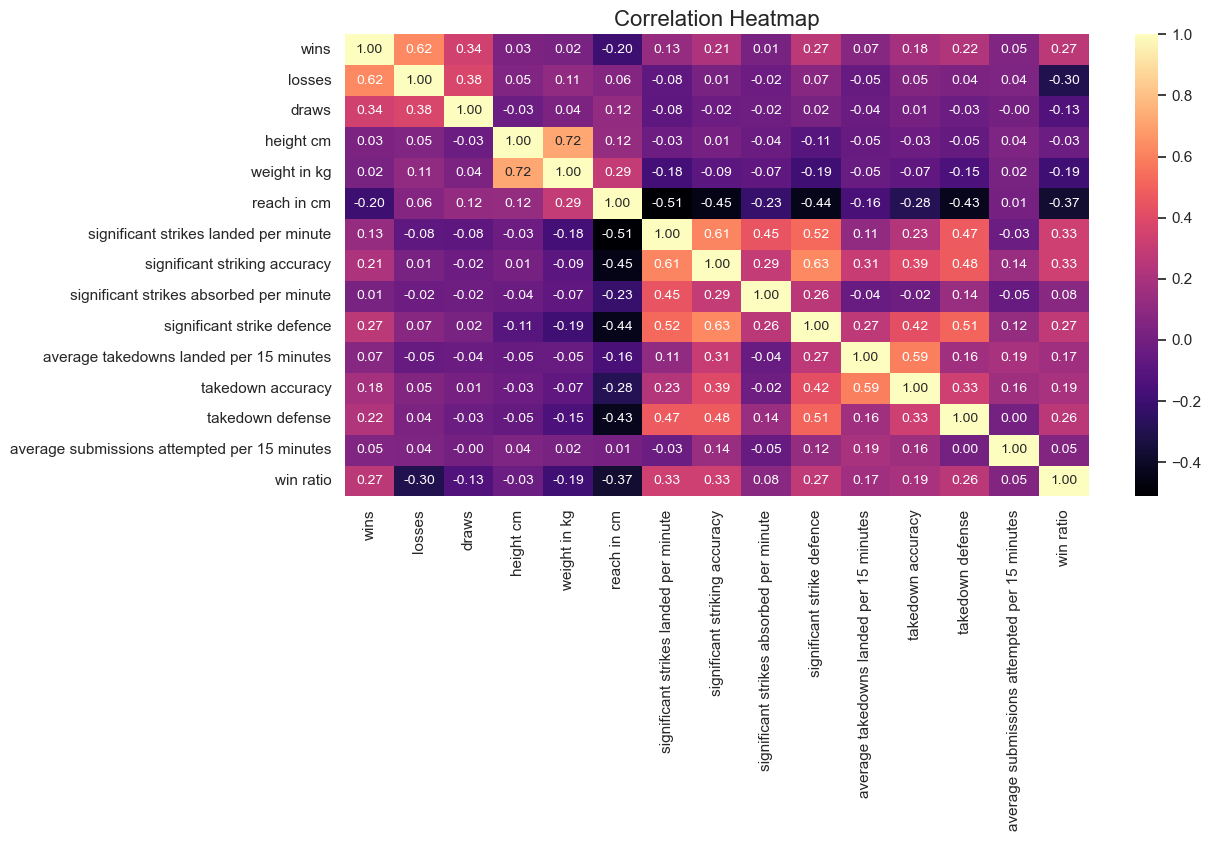

In [39]:
# This code makes the correlation heatmap to show the correlation between different features
corr_data = data.copy()
corr_data = corr_data.drop(columns = ["name", "nickname", "stance", "date of birth"])
corr_data.insert(14, "win ratio", corr_data['wins']/(corr_data['wins'] + corr_data['losses'] + corr_data['draws']))
correlation_matrix = corr_data.corr()
plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix, cmap = 'magma', annot = True, fmt = ".2f", annot_kws = {"size" : 10})
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Analysis of Correlation Values

### Weak Correlations:

#### The highest positive correlation of win ratio is with significant striking accuracy, which is 0.33, significant strikes landed per minute is 0.33, and , average takedowns landed per 15 minutes, which is very low. Typically, correlations above 0.7 are considered strong, while those below 0.3 are weak. All the correlations in my dataset fall into the "weak" category.

### Low Negative Correlations:

#### The most negative correlation is with reach, which is -0.37, losses which is  -0.30, and weight in kg, which is -0.19. However, this is also very weak and does not provide any significant explanation.

### Remaining Features:

#### Features like Height(cm), average submissions attempted per minute have correlations close to 0, indicating no linear relationship with the win ratio.

# Conclusion:

#### The correlation analysis confirms that none of the features in the dataset have a strong linear relationship with the win ratio. While a few features might have minor effects, they are not substantial enough to predict win ratio reliably

In [40]:
data.isnull().sum()

name                                               0
nickname                                        1673
wins                                               0
losses                                             0
draws                                              0
height cm                                          0
weight in kg                                       0
reach in cm                                        0
stance                                           716
date of birth                                    984
significant strikes landed per minute              0
significant striking accuracy                      0
significant strikes absorbed per minute            0
significant strike defence                         0
average takedowns landed per 15 minutes            0
takedown accuracy                                  0
takedown defense                                   0
average submissions attempted per 15 minutes       0
dtype: int64

In [41]:
data.shape

(3773, 18)

In [42]:
all_stance = data.copy()

In [43]:
all_stance = all_stance.dropna(subset = ['stance'])

In [44]:
all_stance.insert(18, "win ratio", all_stance['wins']/(all_stance['wins'] + all_stance['losses'] + all_stance['draws']))

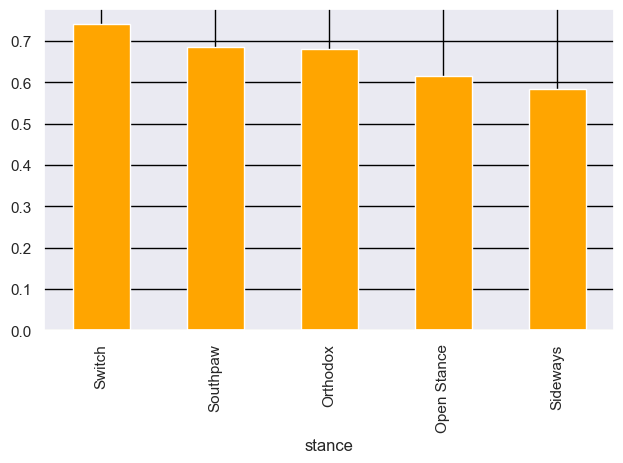

In [45]:
stance_win_rate = all_stance.groupby('stance')['win ratio'].mean().sort_values(ascending = False)
stance_win_rate.plot(kind = 'bar', color = "orange")
plt.grid(color = "black")
plt.tight_layout()

#### stance win ratio suggests that Switch is the best stance and Sideways is the Worst and Switch has more Win rate than any other stance or fighting style.

In [46]:
data['stance'].value_counts()

stance
Orthodox       2340
Southpaw        523
Switch          186
Open Stance       6
Sideways          2
Name: count, dtype: int64

# Linear Regression

In [47]:
all_stance = all_stance.drop(columns = ["name", "nickname", "wins", "losses", "draws", "date of birth"])

In [48]:
all_stance.shape

(3057, 13)

In [49]:
all_stance = pd.get_dummies(all_stance, columns = ['stance'], prefix = 'stance', drop_first = False)

In [50]:
columns = ['stance_Open Stance', 'stance_Orthodox', 'stance_Sideways', 'stance_Southpaw', 'stance_Switch']
for col in columns:
    all_stance[col] = all_stance[col].astype(int)

In [51]:
all_stance.head()

height cm  weight in kg  reach in cm  \
0     190.50         92.99  1791.860503   
4     190.50         83.91   193.040000   
5     175.26         70.31  1636.037050   
7     182.88         83.91  1702.075497   
8     177.80         70.31   175.260000   

   significant strikes landed per minute  significant striking accuracy  \
0                                   0.00                            0.0   
4                                   2.05                           60.0   
5                                   0.00                            0.0   
7                                   3.21                           66.0   
8                                   1.91                           42.0   

   significant strikes absorbed per minute  significant strike defence  \
0                                     0.00                         0.0   
4                                     2.73                        42.0   
5                                     4.00                        38.0   
7                                     1.28                         0.0   
8                                     6.22                        33.0   

   average takedowns landed per 15 minutes  takedown accuracy  \
0                                     7.32              100.0   
4                                    10.23              100.0   
5                                     0.00                0.0   
7                                     0.00                0.0   
8                                     0.00                0.0   

   takedown defense  average submissions attempted per 15 minutes  win ratio  \
0               0.0                                          21.9   1.000000   
4               0.0                                          20.4   0.800000   
5               0.0                                          16.4   0.562500   
7              40.0                                          14.4   0.363636   
8               0.0                                          14.3   0.750000   

   stance_Open Stance  stance_Orthodox  stance_Sideways  stance_Southpaw  \
0                   0                1                0                0   
4                   0                1                0                0   
5                   0                1                0                0   
7                   0                1                0                0   
8                   0                1                0                0   

   stance_Switch  
0              0  
4              0  
5              0  
7              0  
8              0

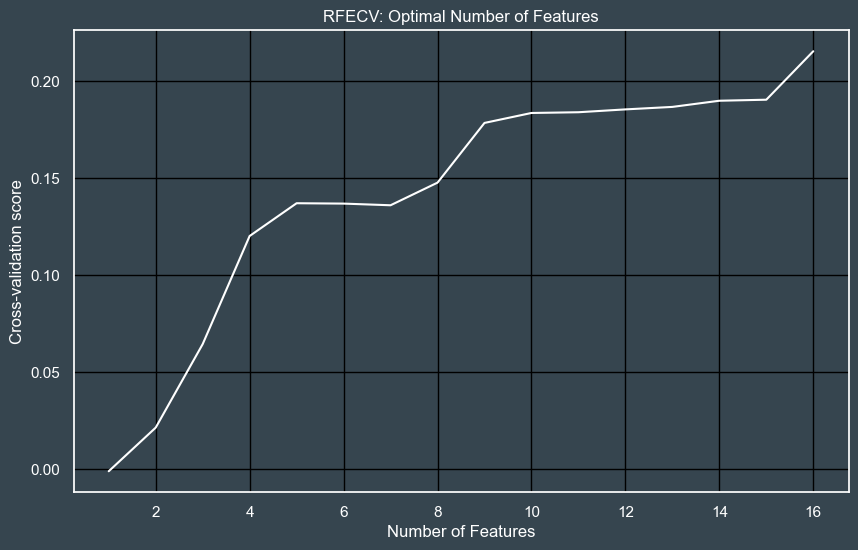

In [52]:
# Output generated by this code tell how many features are best suited to predict the win ratio
y = all_stance['win ratio']
x = all_stance.drop(columns = ['win ratio'])
train_x1, test_x1, train_y1, test_y1 = train_test_split(x, y, test_size =0.25, random_state = 42)
model = LinearRegression()
rfecv = RFECV(estimator = model, step = 1, cv = 5)
rfecv.fit(train_x1, train_y1)
selected_columns = x.columns[rfecv.support_]
plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#36454F')
plt.gca().set_facecolor('#36454F') 
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], color = "white")
plt.grid(color = "black")
plt.xlabel('Number of Features', color = "white")
plt.ylabel('Cross-validation score', color = "white")
plt.title('RFECV: Optimal Number of Features', color = "white")
plt.show()

#### The above graph suggests that Linear Regression performs best, when all the features are used as independent variable while predicting the win ratio.

In [53]:
best_columns = x.columns[rfecv.support_]
x[best_columns]

height cm  weight in kg  reach in cm  \
0        190.50         92.99  1791.860503   
4        190.50         83.91   193.040000   
5        175.26         70.31  1636.037050   
7        182.88         83.91  1702.075497   
8        177.80         70.31   175.260000   
...         ...           ...          ...   
4106     175.26        106.59  1693.046466   
4107     172.72         70.31  1614.020887   
4108     180.34         77.11  1672.289690   
4109     190.50         83.91   210.820000   
4110     162.56         52.16   162.560000   

      significant strikes landed per minute  significant striking accuracy  \
0                                      0.00                            0.0   
4                                      2.05                           60.0   
5                                      0.00                            0.0   
7                                      3.21                           66.0   
8                                      1.91                           42.0   
...                                     ...                            ...   
4106                                   0.00                            0.0   
4107                                   0.00                            0.0   
4108                                   9.47                           60.0   
4109                                   1.28                           33.0   
4110                                   0.80                           29.0   

      significant strikes absorbed per minute  significant strike defence  \
0                                        0.00                         0.0   
4                                        2.73                        42.0   
5                                        4.00                        38.0   
7                                        1.28                         0.0   
8                                        6.22                        33.0   
...                                       ...                         ...   
4106                                     0.00                         0.0   
4107                                     0.00                         0.0   
4108                                    12.63                         0.0   
4109                                     2.55                        33.0   
4110                                     4.60                        42.0   

      average takedowns landed per 15 minutes  takedown accuracy  \
0                                        7.32              100.0   
4                                       10.23              100.0   
5                                        0.00                0.0   
7                                        0.00                0.0   
8                                        0.00                0.0   
...                                       ...                ...   
4106                                     0.00                0.0   
4107                                     0.00                0.0   
4108                                     0.00                0.0   
4109                                     0.00                0.0   
4110                                     2.00               18.0   

      takedown defense  average submissions attempted per 15 minutes  \
0                  0.0                                          21.9   
4                  0.0                                          20.4   
5                  0.0                                          16.4   
7                 40.0                                          14.4   
8                  0.0                                          14.3   
...                ...                                           ...   
4106               0.0                                           0.0   
4107               0.0                                           0.0   
4108             100.0                                           0.0   
4109               0.0                                

In [54]:
train_n1, test_n1, train_m1, test_m1 = train_test_split(x[selected_columns], y, test_size = 0.31, random_state = 42)
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_n1)
scaled_test = scaler.transform(test_n1)
model2 = LinearRegression()
model2.fit(scaled_train, train_m1)
predicted_m1 = model2.predict(scaled_test)
mse2 = mean_squared_error(test_m1, predicted_m1)
r2_2 = r2_score(test_m1, predicted_m1)
print("mse : ", mse2,"\nR-Squared : ", r2_2)

mse :  0.022084958068878665 
R-Squared :  0.27340048903358727


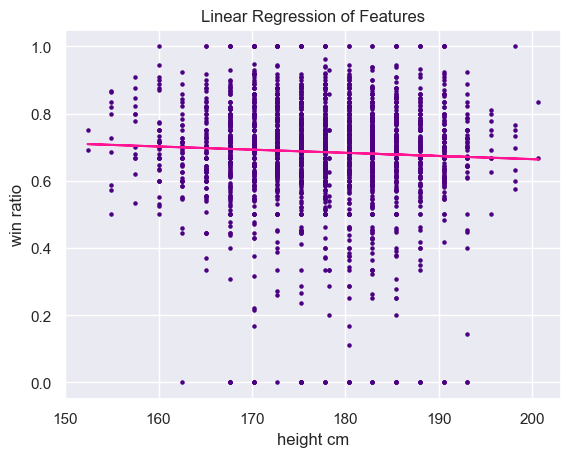

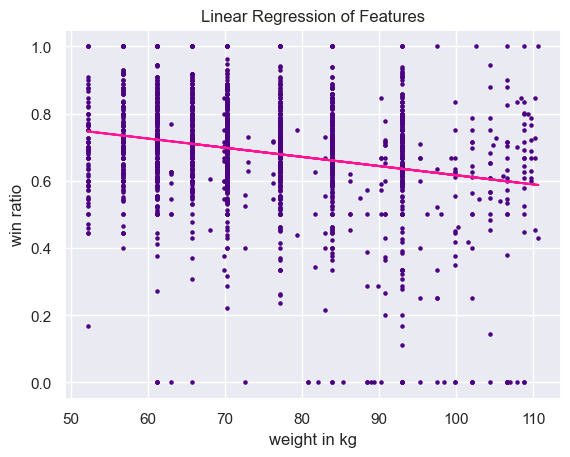

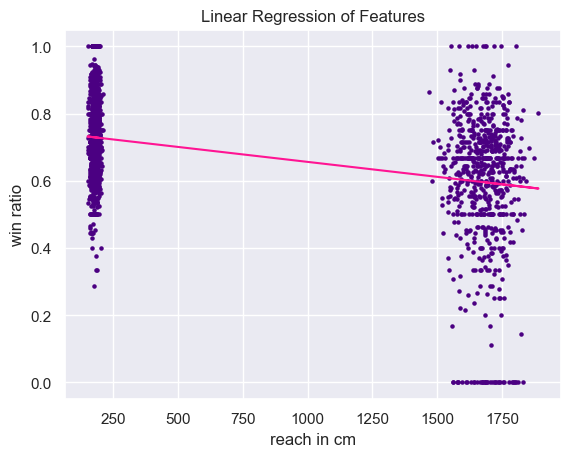

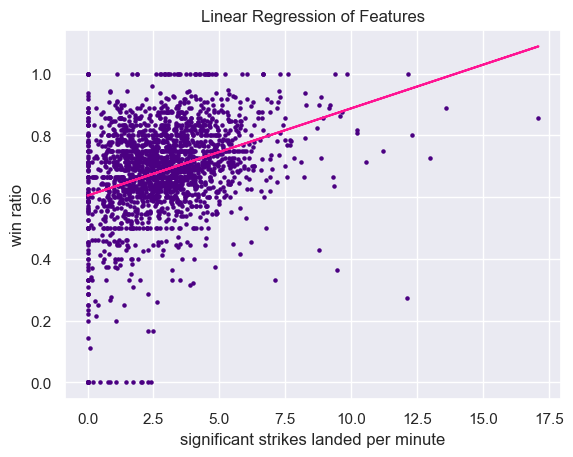

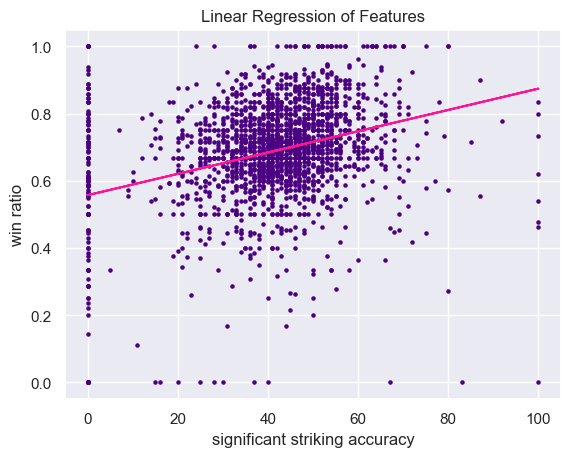

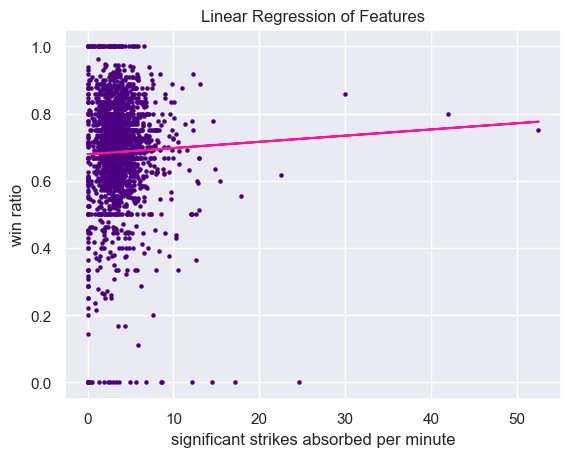

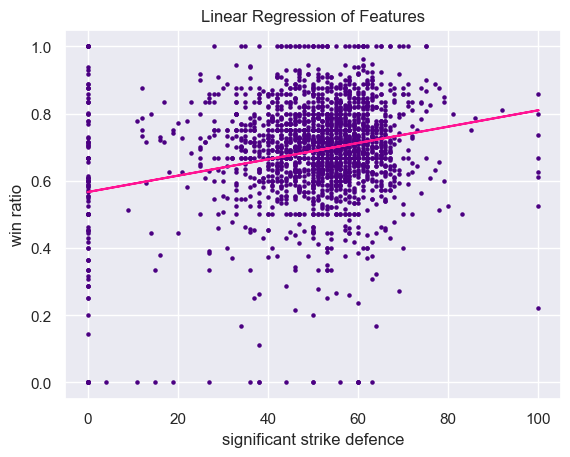

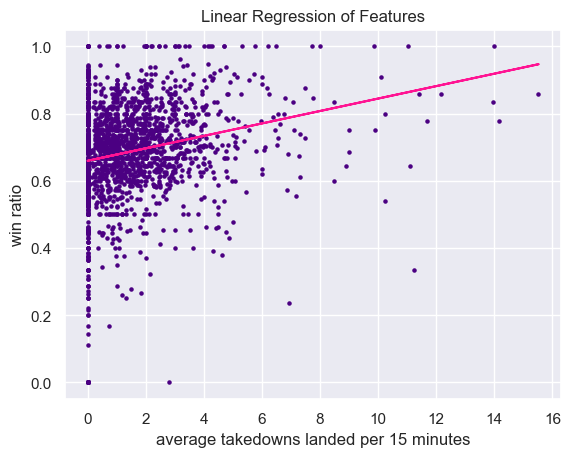

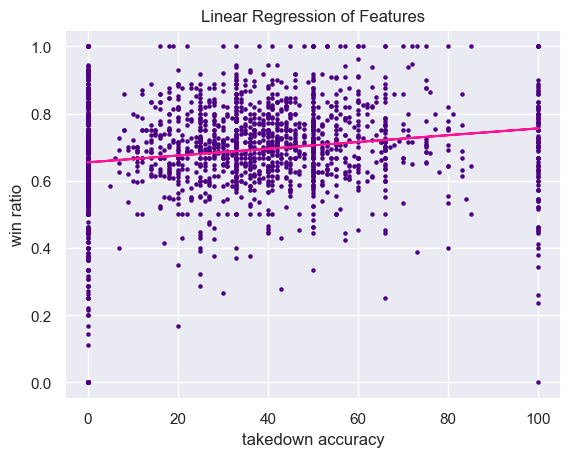

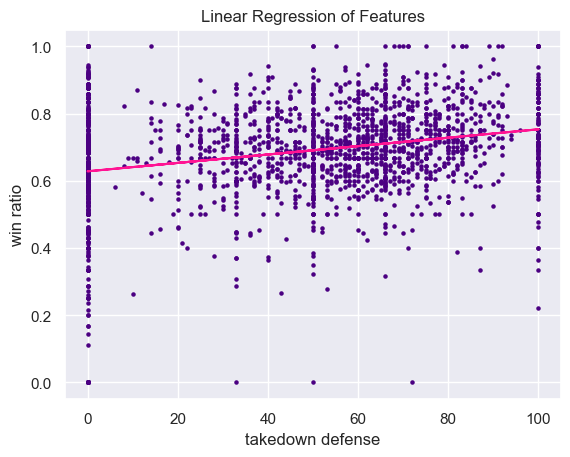

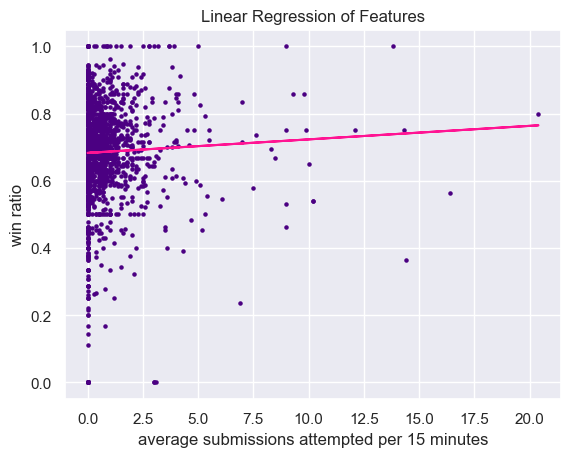

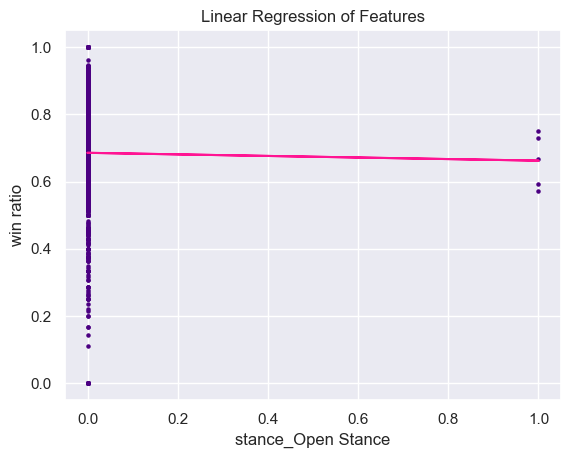

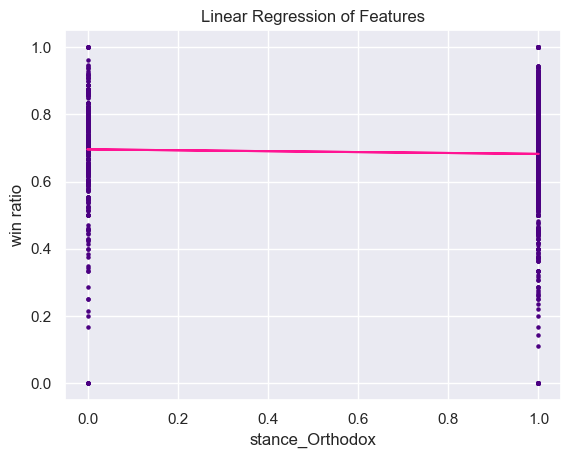

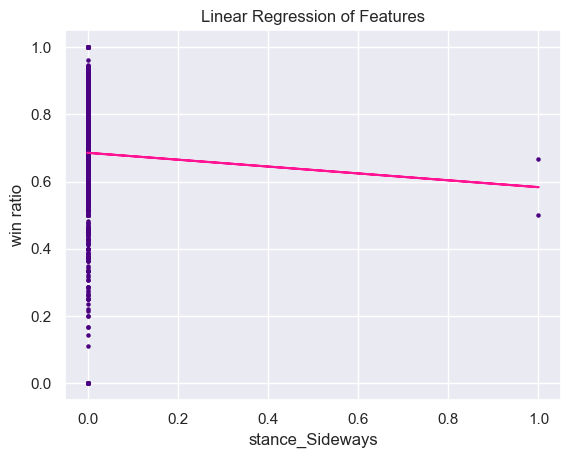

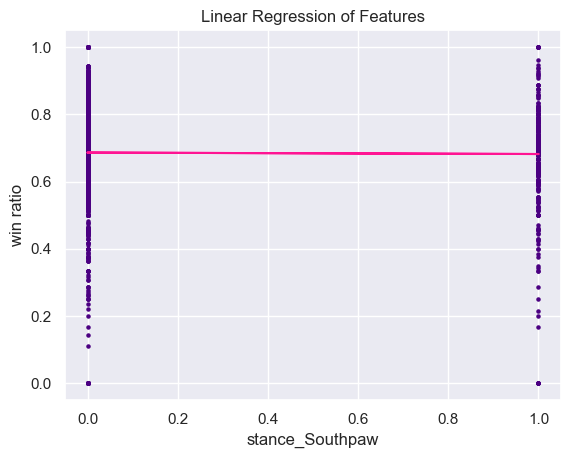

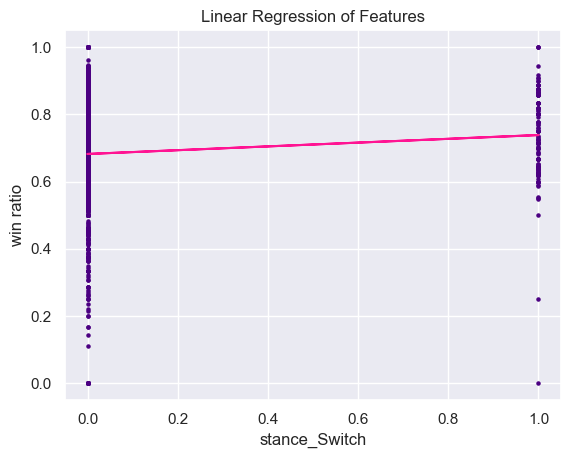

In [55]:
for column in x[selected_columns]:
    model2.fit(train_n1[column].values[:, np.newaxis], train_m1.values)
    plt.scatter(train_n1[column].values[:, np.newaxis], train_m1.values, color = "indigo", s = 5)
    plt.plot(train_n1[column].values[:, np.newaxis], model2.predict(train_n1[column].values[:, np.newaxis]), color = "deeppink")
    plt.title("Linear Regression of Features")
    plt.xlabel(str(column))
    plt.ylabel("win ratio")
    plt.show()

# Interpretation:
#### The "significant strikes landed per minute vs win ratio", "significant strike accuracy vs win ratio", "significant strike defence vs win ratio", and "average takedowns landed per 15 minutes vs win ratio" shows a stronger relationship whereas rest of the plots shows significantly less strong or rather weak relationship.

# Conclusion

##### Mean Squared Error (MSE):

##### The MSE value of 0.0220 indicates the average squared difference between the actual and predicted values. Which means it shows how far off, on average, the model's predictions are from the actual values. And as the value is relatively low, the model is not making large errors in prediction, which is a good sign.

##### R-squared (R²):

##### The R² value of 0.2733 means that the model is explaining about 27.34% of the variance in the target variable (in this case, the win ratio. This value suggests that the linear model is able to capture some relationship, but there is still 72.66% of the variance that is not explained by the model.

# Polynomial Regression with validation curve and learning curve

In [56]:
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

Text(0, 0.5, 'score')

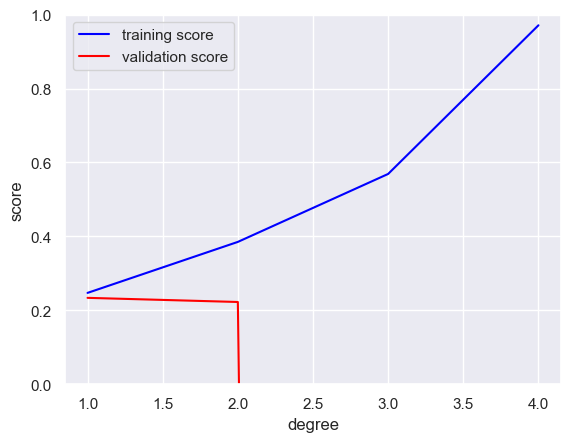

In [57]:
# This code checks if there any polynomial degree which fits better than linear regression
X = x[selected_columns]
train_j, test_j, train_k, test_k = train_test_split(X, y, test_size = 0.20, random_state = 22)
degree = np.arange(1, 5)
training_score, validation_score = validation_curve(estimator = PolynomialRegression(), X = train_j, y = train_k, param_name = 'polynomialfeatures__degree', param_range = degree, cv = 3)
plt.plot(degree, np.median(training_score, 1), color='blue', label='training score') 
plt.plot(degree, np.median(validation_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

# Conclusion

#### The validation curve function suggests that the best model for this data is linear regression so using polynomial wouldn't be advantageous.

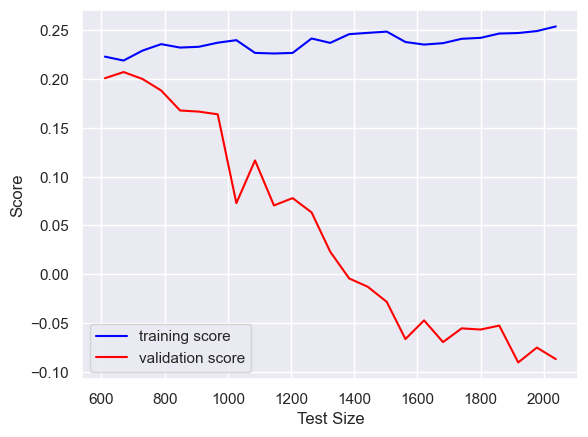

In [58]:
model = LinearRegression()
N, training_lc, validation_lc = learning_curve(estimator = model, X = X, y = y, train_sizes = np.linspace(0.3, 1, 25), cv = 3)
plt.plot(N, np.mean(training_lc, 1), color = "blue", label = 'training score')
plt.plot(N, np.mean(validation_lc, 1), color = "red", label = "validation score")
plt.xlabel("Test Size")
plt.ylabel("Score")
plt.legend(loc = "best")
plt.show()

# Conclusion

### Training Score Increase as Test Size Increases:

##### Interpretation: As the test size increases, the model has access to more data for training. This means it gets better at learning the underlying patterns in the training data. A higher training score indicates that the model is better able to fit the data, i.e., it's learning more effectively as it sees more training examples.

### Validation Score Decreases:

##### Interpretation: This behavior suggests that the model's performance deteriorates as more training data is added. This could be due to several reasons:

##### 1. Overfitting vs. Underfitting: With a small test size, the model might have fit too closely to the training data (overfitting), giving a good score. With a larger test size, it may struggle to generalize well (underfitting), so the score drops.

###### 2. Model Generalization: The model may not be good at handling more data (the larger test size), which causes its performance to drop as it can't predict as well on new, unseen data.

###### 3. Training vs. Test Data Size: A smaller test set can give unreliable results. A larger test set gives a better idea of how well the model works, but if performance drops, it means the model may have been too tailored to the smaller test set.

##### 4. Data Quality: The larger test set might have more noise or variability, making it harder for the model to perform well, leading to a worse score.

# Random Forest Regression

In [59]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 42)
model = RandomForestRegressor(random_state = 42)
param_grid = {'n_estimators' : [10, 20, 50, 100, 200]}
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid.fit(train_x, train_y)
grid.best_estimator_,

(RandomForestRegressor(n_estimators=200, random_state=42),)

In [60]:
final_model = grid.best_estimator_
final_model.fit(train_x, train_y)
imp = pd.DataFrame(columns = ['Column', 'Feature importance'])
importances = final_model.feature_importances_
for column, importance in zip(train_x.columns, importances):
    imp = pd.concat([imp, pd.DataFrame({'column' : [column], "Feature importance" : [importance]})])
imp['Feature importance'] = imp['Feature importance'].sort_values(ascending = False)
imp.drop(columns = ['Column'], inplace = True)

In [61]:
imp = imp.set_index(imp['column'])
imp = imp.drop(columns = ['column'])

In [62]:
imp

Feature importance
column                                                          
height cm                                               0.278078
weight in kg                                            0.123597
reach in cm                                             0.114147
significant strikes landed per minute                   0.104500
significant striking accuracy                           0.075344
significant strikes absorbed per minute                 0.073488
significant strike defence                              0.046988
average takedowns landed per 15 minutes                 0.046449
takedown accuracy                                       0.045194
takedown defense                                        0.034979
average submissions attempted per 15 minutes            0.028277
stance_Open Stance                                      0.010593
stance_Orthodox                                         0.010369
stance_Sideways                                         0.007822
stance_Southpaw                                         0.000092
stance_Switch                                           0.000083

## Conclusion :

##### Earlier by seeing the graph it was clear that Switch stance has the highest win ratio and is the best, but after performing Random Forest Regression it is clear that overall Stance has the least feature importance and out of that Switch has the least importance and "Height" is the most significant feature in predicting the Win Ratio.

In [63]:
predicted_y = final_model.predict(test_x)
mse = mean_squared_error(test_y, predicted_y)
r2 = r2_score(test_y, predicted_y)
print("mse : ",mse, "\nR-Squared : ",r2)

mse :  0.021431814656306142 
R-Squared :  0.2966778566666495


# Conclusion

##### Mean Squared Error (MSE):

##### The MSE value of 0.02143 indicates the average squared difference between the actual and predicted values. Which means it shows how far off, on average, the model's predictions are from the actual values. And as the value is relatively low, the model is not making large errors in prediction, which is a good sign.

##### R-squared (R²):

##### The R² value of 0.2966 means that the model is explaining about 29.67% of the variance in the target variable (in this case, the win ratio. This value suggests that the Random Forest Regression model is able to capture some relationship, but there is still 70.33% of the variance that is not explained by the model.

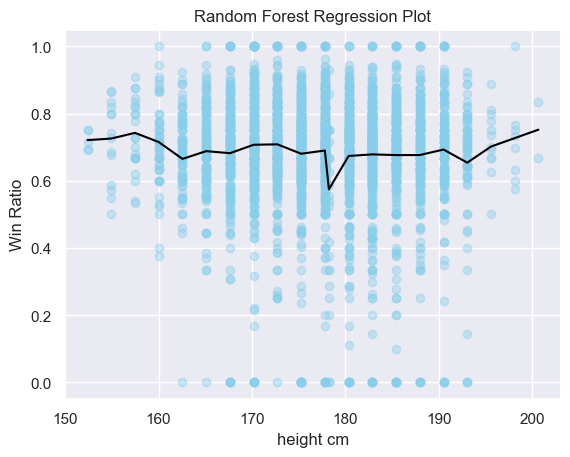

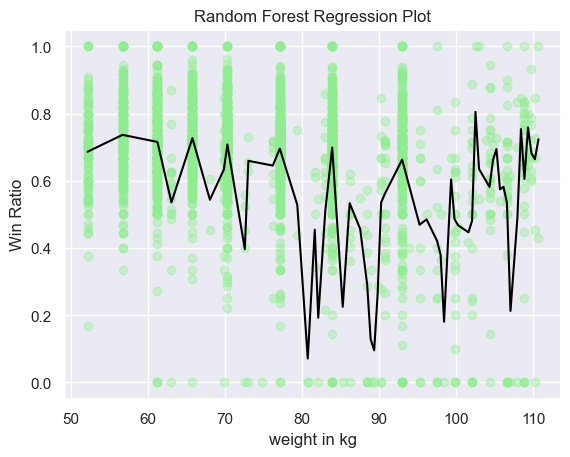

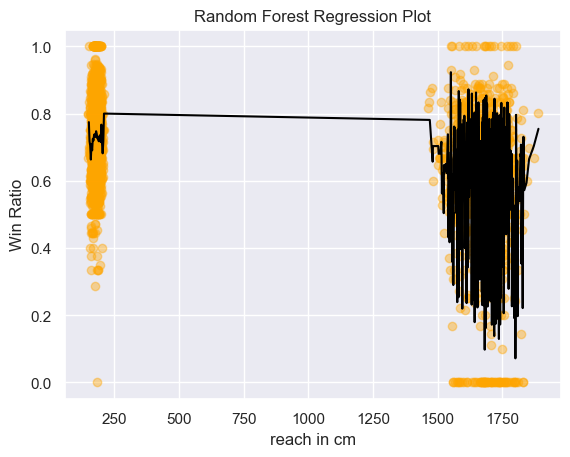

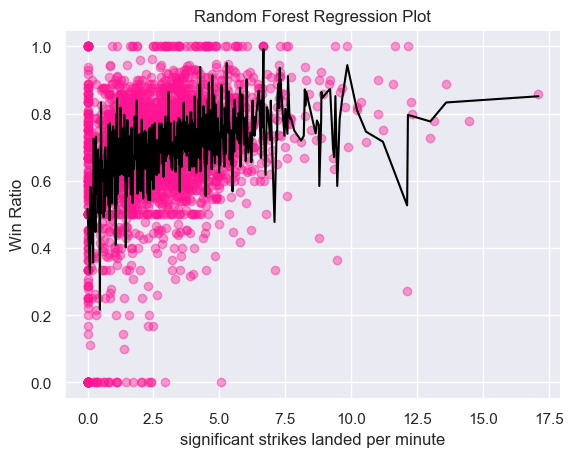

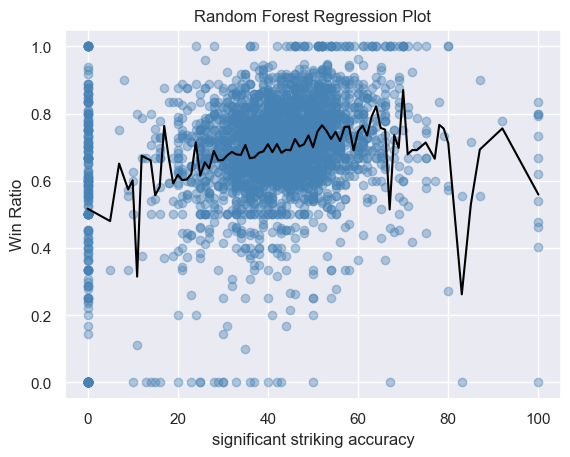

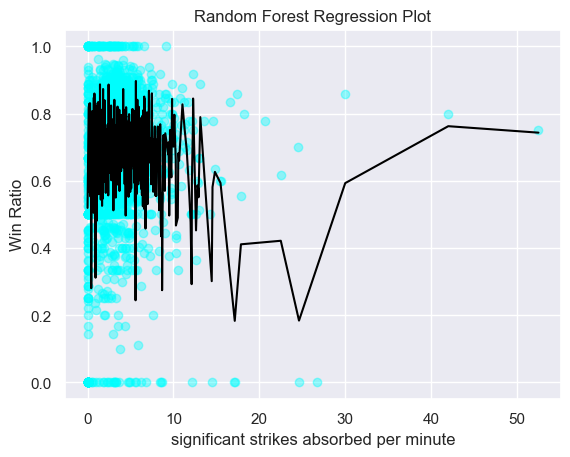

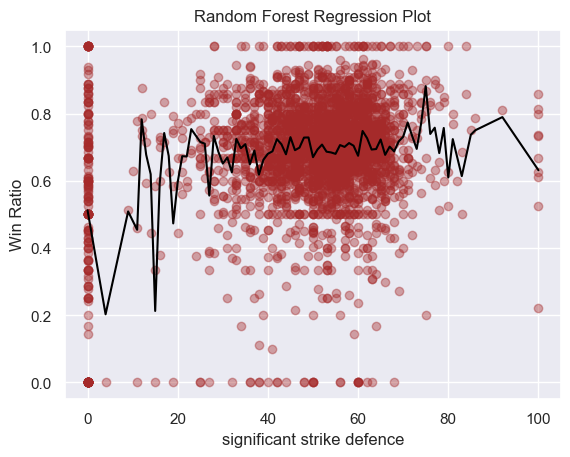

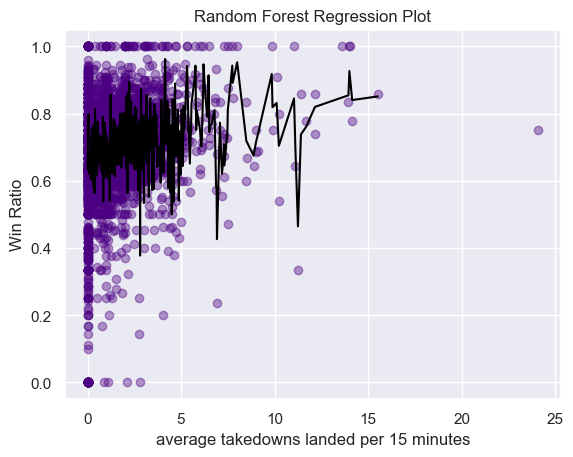

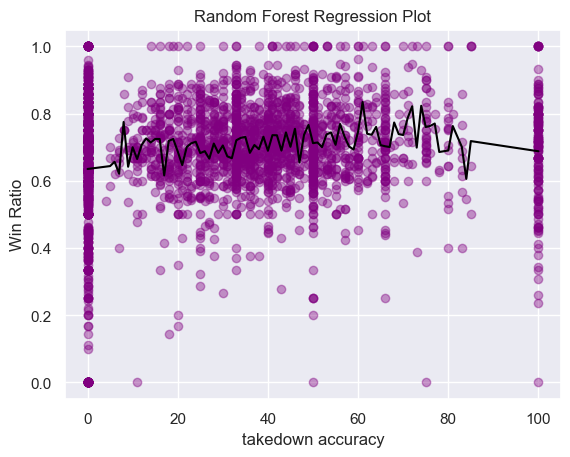

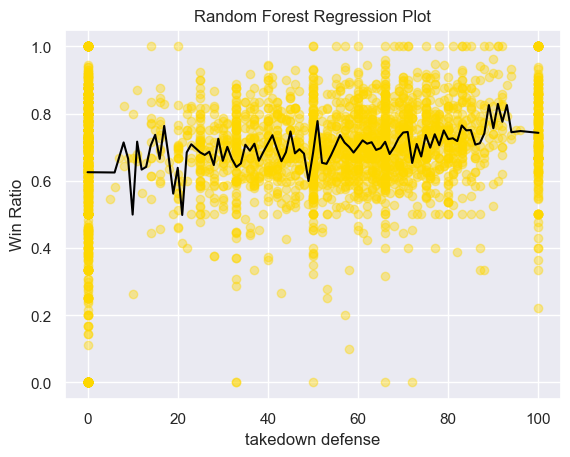

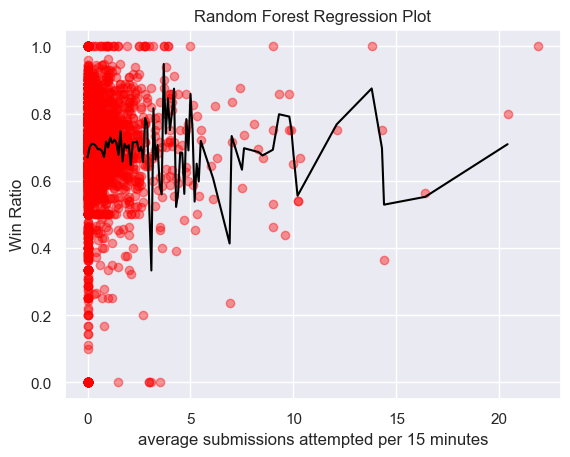

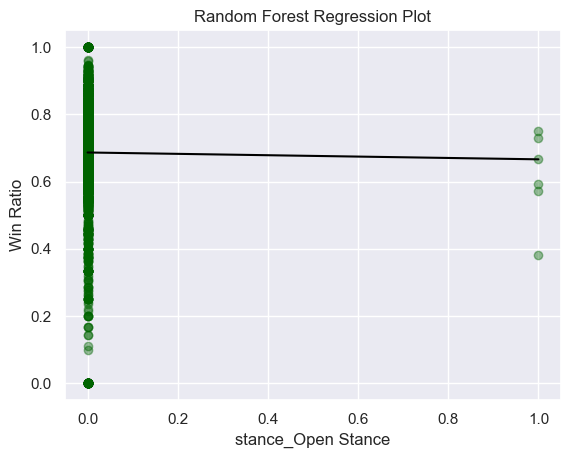

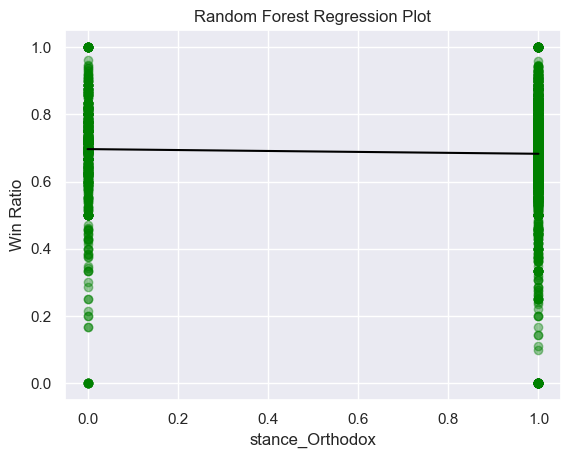

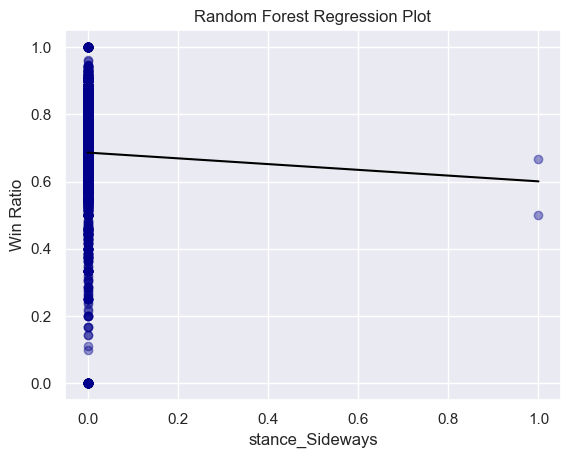

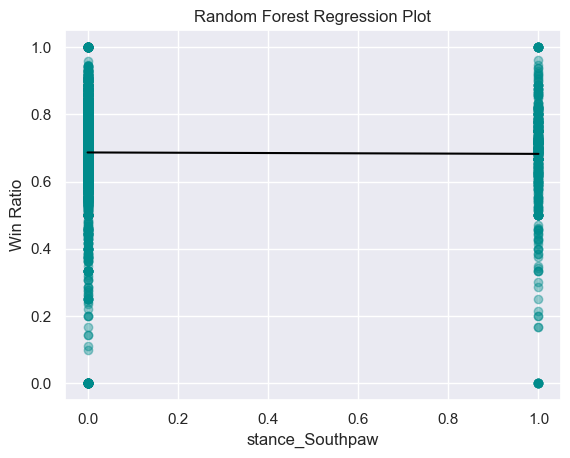

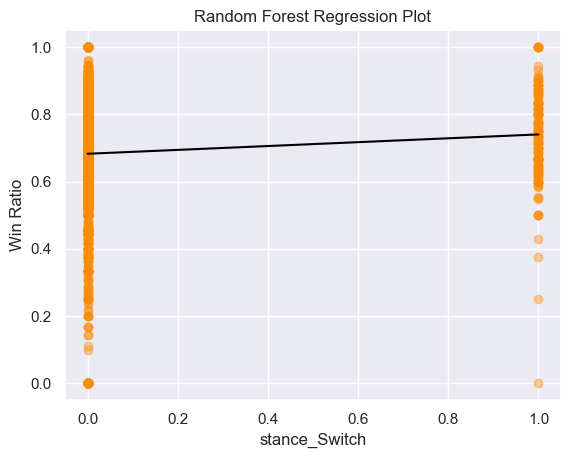

In [64]:
color_point = ["darkorange", "darkcyan", "darkblue", "green", "darkgreen", "red", "gold", "purple", "indigo", "brown", "cyan", "steelblue", "deeppink", "orange", "lightgreen", "skyblue"]
color_point.reverse()
for feature, colore in zip(x[selected_columns].columns, color_point):
    sorted_x = np.argsort(train_x.loc[:, feature].values, axis = 0)
    column = train_x.loc[:, feature].values[sorted_x]
    sorted_y = train_y.values[sorted_x]
    final_model.fit(column[:, np.newaxis], sorted_y)
    pred_y = final_model.predict(column[:, np.newaxis])
    plt.scatter(x.loc[:, feature], y, color = colore, alpha = 0.4)
    plt.plot(column, pred_y, color = "black")
    plt.xlabel(str(feature))
    plt.ylabel("Win Ratio")
    plt.title("Random Forest Regression Plot")
    plt.show()

# <u>Conclusion</u> :

#### The feature_importances_values from the Random Forest Regressor tell us how much each feature contributes to predicting the target variable, here Win Ratio

### <u>Most Important Features</u>: 
#### 1. height (0.278) and weight (0.123) are the most important features. This means that out of all the features, these two have the highest influence on the win ratio, according to the Random Forest model.

#### 2. Even though they are the most important, their contribution is still relatively small compared to what we might expect for a strong predictor.

### <u>Moderately Important Features</u>: 
#### 1. Features like reach(0.1141) and significant strikes landed per minute(0.1045) have moderate importance.

#### 2. These features might have some effect on predicting the win ratio, but their influence is not very strong.

### <u>Least Important Features</u>:
#### 1. Features like all type of stance, average submissions attempted per 15 minutes(0.0282) contribute very little to the prediction of win ratio.

# <u>Low Overall Importance</u>:
####  After getting the Feature Importances even the most important features have relatively low importance scores indicates that the Random Forest model struggles to find strong relationships between the features and win ratio.

# Support Vector Regression

In [65]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, random_state = 42, test_size = 0.35)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaled_train_x = scaler_x.fit_transform(train_X)
scaled_test_x = scaler_x.transform(test_X)
scaled_train_y = scaler_y.fit_transform(train_Y.values[:, np.newaxis])
svr_model = SVR()
svr_model.fit(scaled_train_x, scaled_train_y)
svr_pred_y = svr_model.predict(scaled_test_x)
svr_pred_y = scaler_y.inverse_transform(svr_pred_y[:, np.newaxis])
mse_svr = mean_squared_error(test_Y, svr_pred_y)
r2_svr = r2_score(test_Y, svr_pred_y)
print("mse : ", mse_svr, "\nR-Squared : ", r2_svr)

mse :  0.021760495311348327 
R-Squared :  0.25631330723757706


# Conclusion

##### Mean Squared Error (MSE):

##### The MSE value of 0.0217 indicates the average squared difference between the actual and predicted values. Which means it shows how far off, on average, the model's predictions are from the actual values. And as the value is relatively low, the model is not making large errors in prediction, which is a good sign.

##### R-squared (R²):

##### The R² value of 0.2563 means that the model is explaining about 25.63% of the variance in the target variable (in this case, the win ratio. This value suggests that the SVR is able to capture some relationship, but there is still 74.37% of the variance that is not explained by the model.

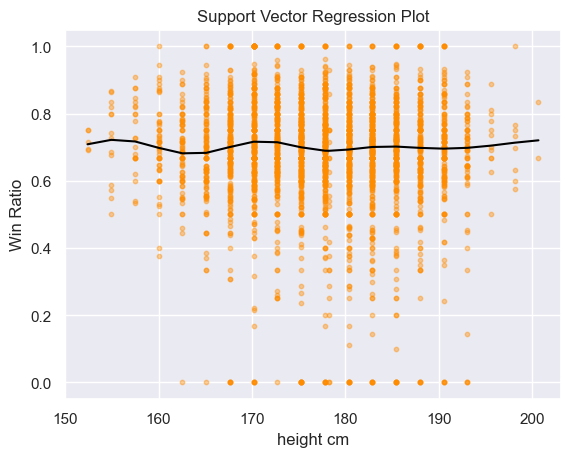

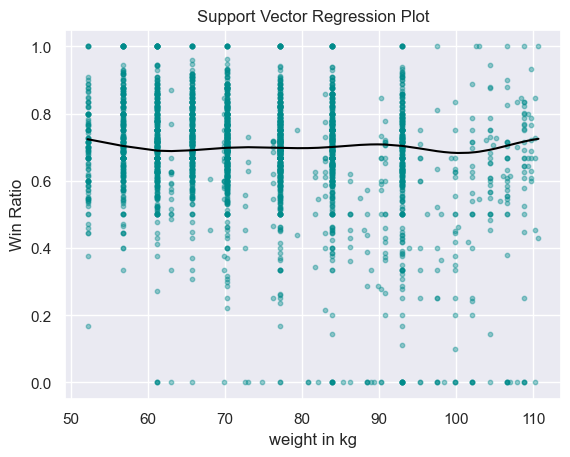

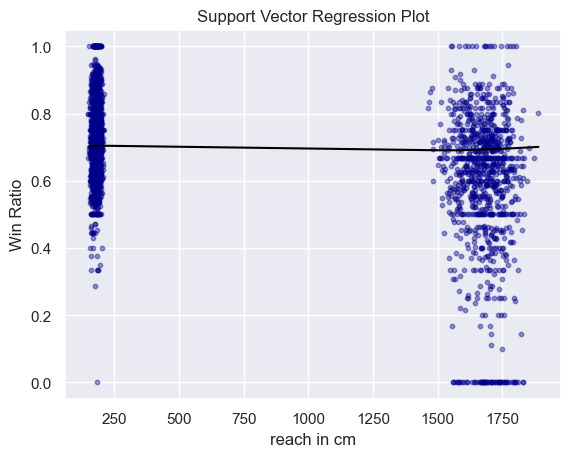

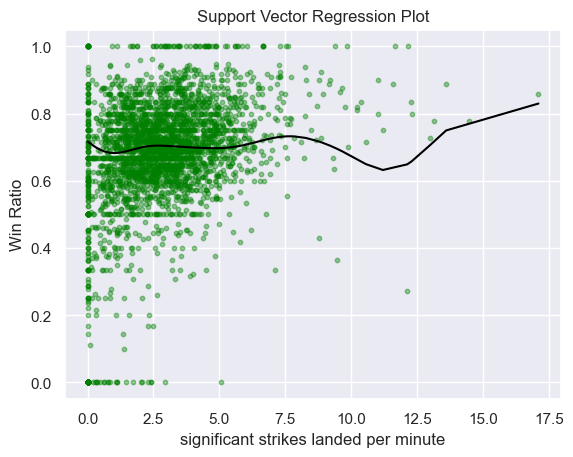

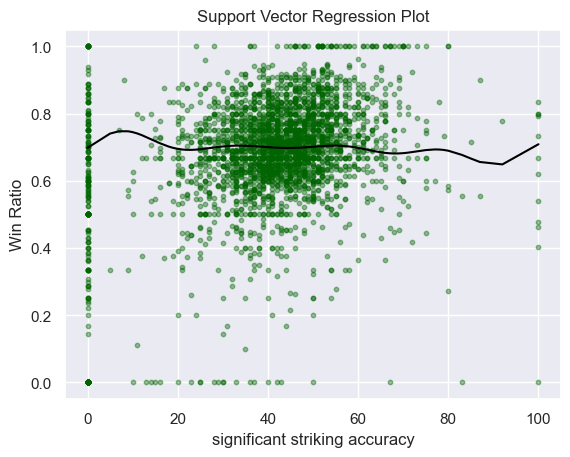

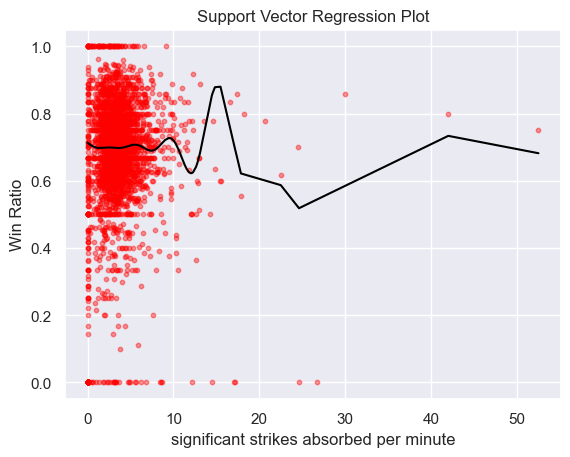

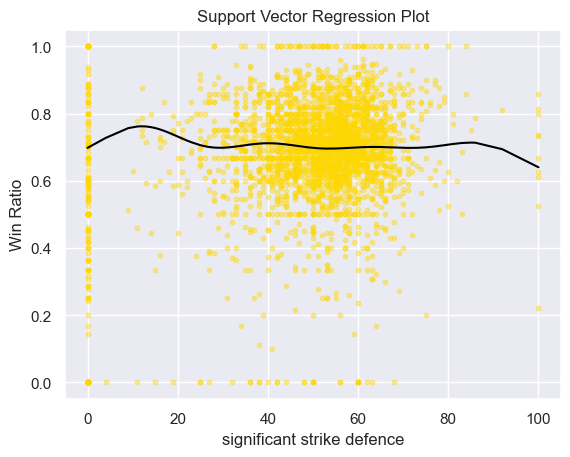

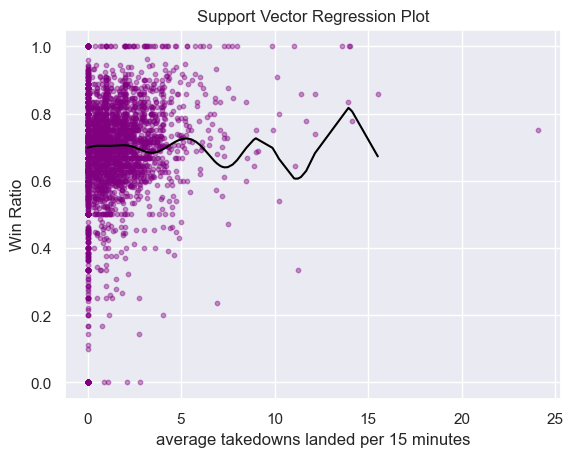

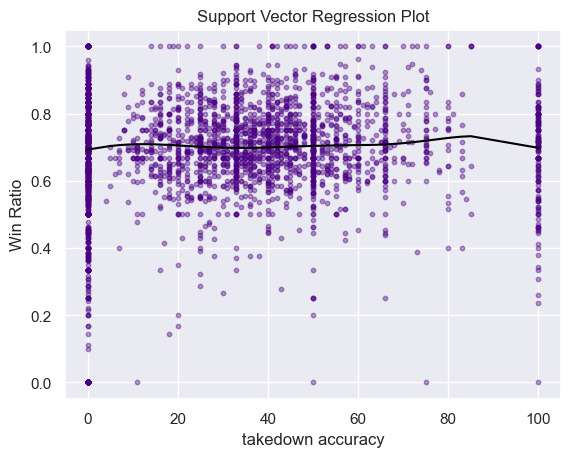

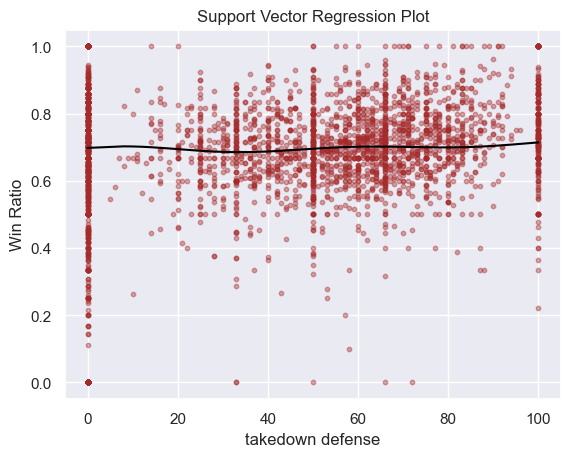

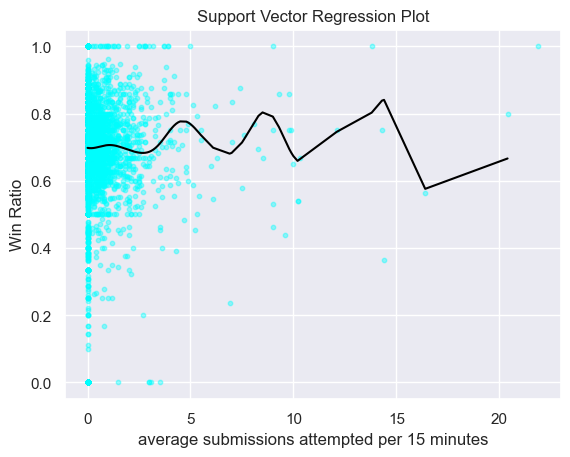

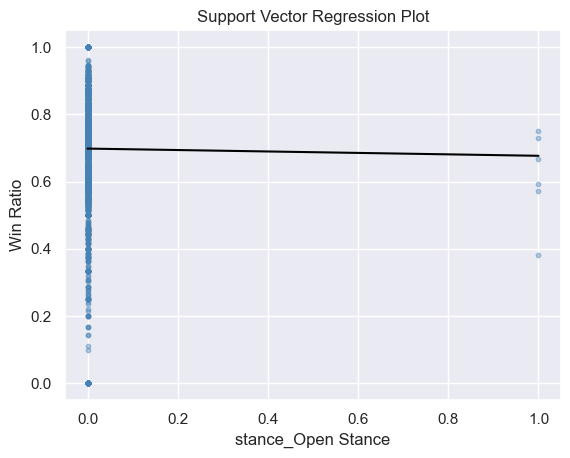

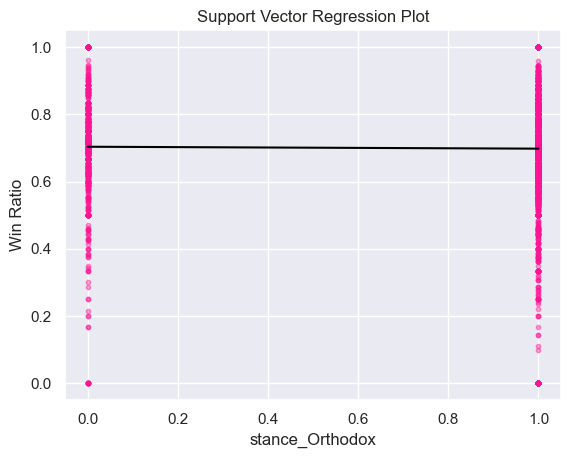

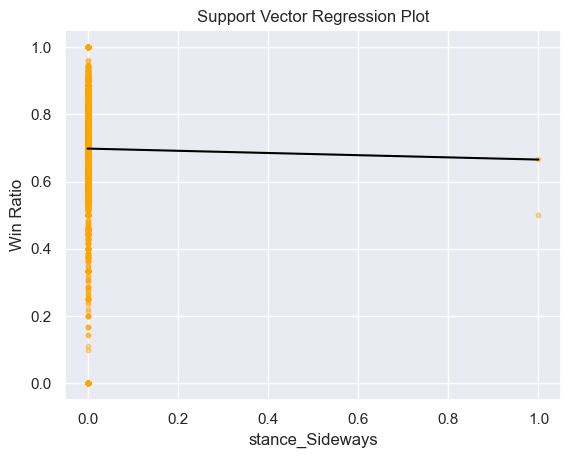

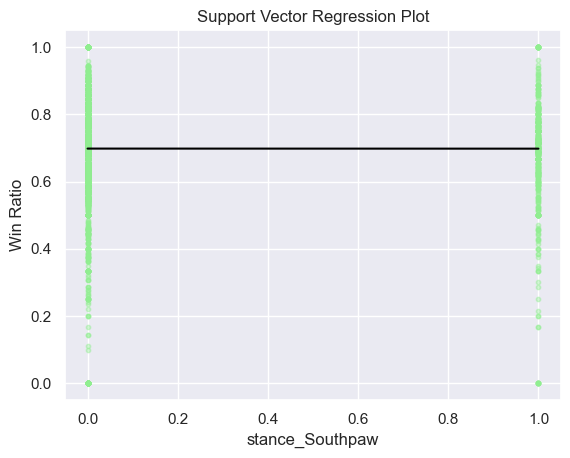

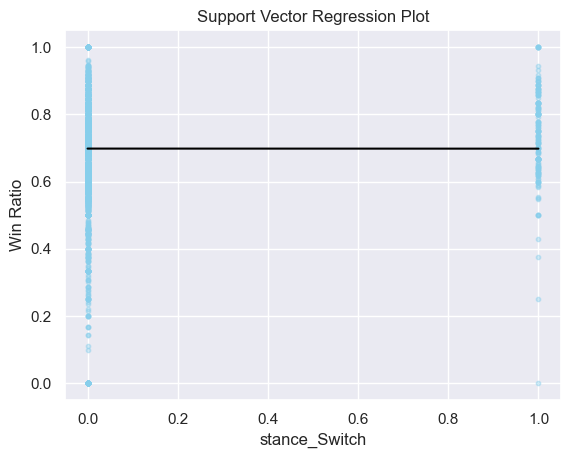

In [66]:
color_scatter = ["darkorange", "darkcyan", "darkblue", "green", "darkgreen", "red", "gold", "purple", "indigo", "brown", "cyan", "steelblue", "deeppink", "orange", "lightgreen", "skyblue"]
for column, color_s in zip(x[selected_columns], color_scatter):
    arg_x = np.argsort(train_X.loc[:, column].values, axis = 0)
    sorted_column = train_X.loc[:, column].values[arg_x]
    scaled_train_y = scaled_train_y[arg_x]
    col_scaler = StandardScaler()
    svr_model.fit(col_scaler.fit_transform(sorted_column[:, np.newaxis]), scaled_train_y)
    plt.scatter(x.loc[:, column], y, color = color_s, s = 10, alpha = 0.4)
    val = svr_model.predict(col_scaler.transform(sorted_column[:, np.newaxis]))
    val = scaler_y.inverse_transform(val[:, np.newaxis]).flatten()
    plt.plot(sorted_column, val, color = "black")
    plt.xlabel(str(column))
    plt.ylabel("Win Ratio")
    plt.title("Support Vector Regression Plot")
    plt.show()

#### The above plots show a linear relationship between all type of stance and win ratio but they are not very strong. Rest of the plots show a non-linear and relatively complex relationship with fluctuations between other features and win ratio.

# Extreme Gradient Boosting Regression

In [67]:
xg_model = XGBRegressor()
xg_model.fit(train_n1, train_m1)
get_y = xg_model.predict(test_n1)
xg_mse = mean_squared_error(test_m1, get_y)
xg_r2 = r2_score(test_m1, get_y)
print("mse : ", xg_mse, "\nR_Squared : ", xg_r2)

mse :  0.02320700666310436 
R_Squared :  0.2364848672197608


# Conclusion

##### Mean Squared Error (MSE):

##### The MSE value of 0.0232 indicates the average squared difference between the actual and predicted values. Which means it shows how far off, on average, the model's predictions are from the actual values. And as the value is relatively low, the model is not making large errors in prediction, which is a good sign.

##### R-squared (R²):

##### The R² value of 0.2364 means that the model is explaining about 23.64% of the variance in the target variable (in this case, the win ratio. This value suggests that the Extreme Gradient Boosting Regression model is able to capture some relationship, but there is still 76.36% of the variance that is not explained by the model.

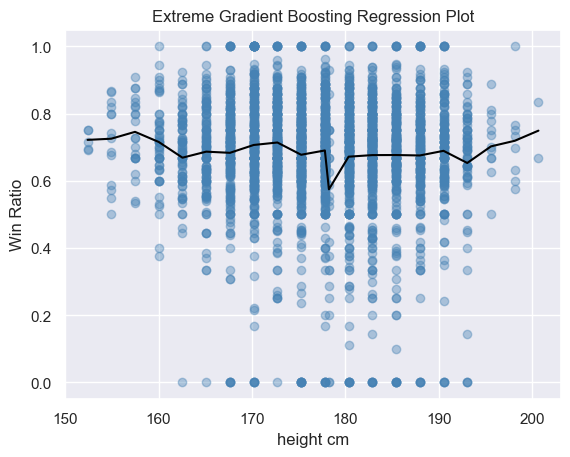

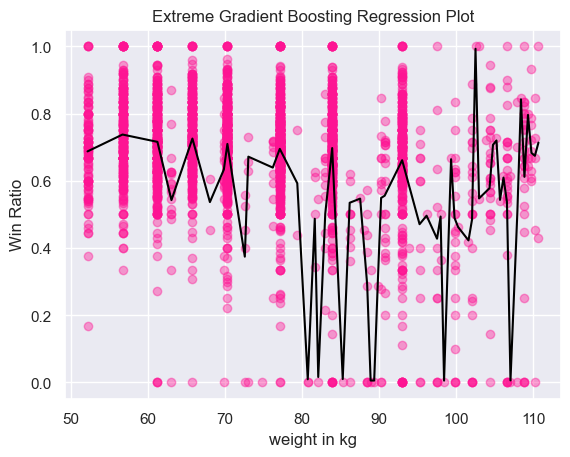

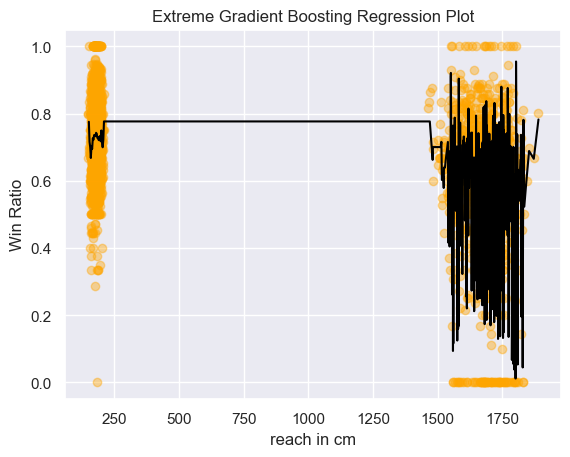

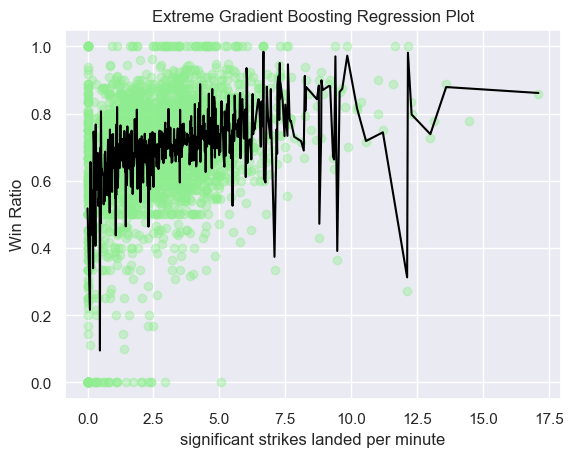

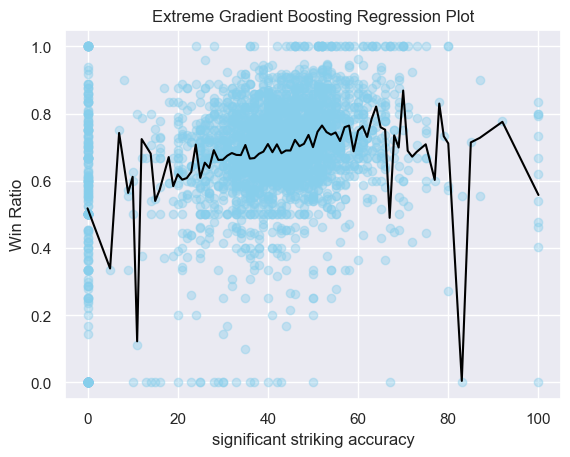

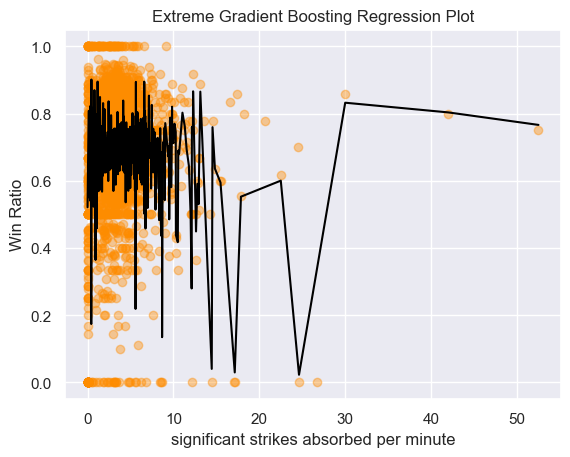

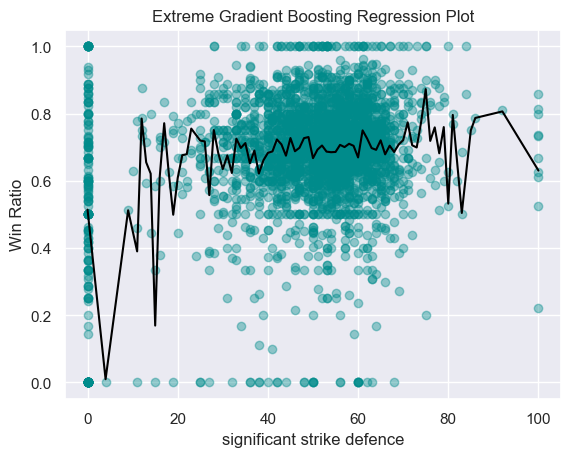

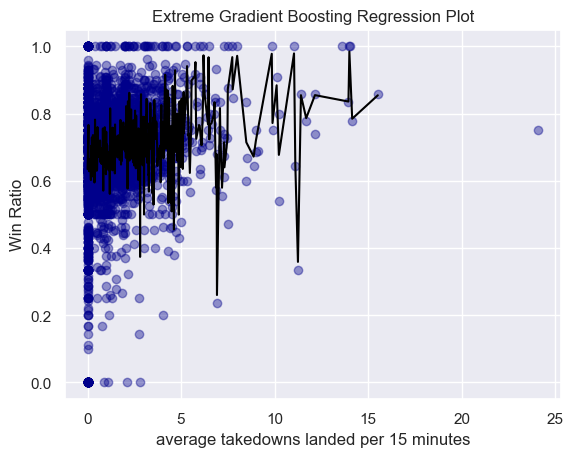

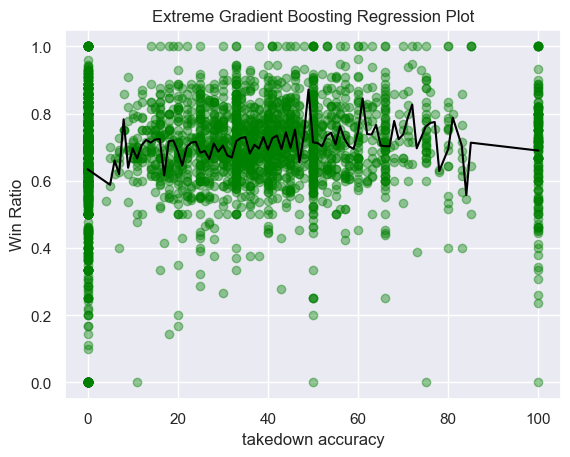

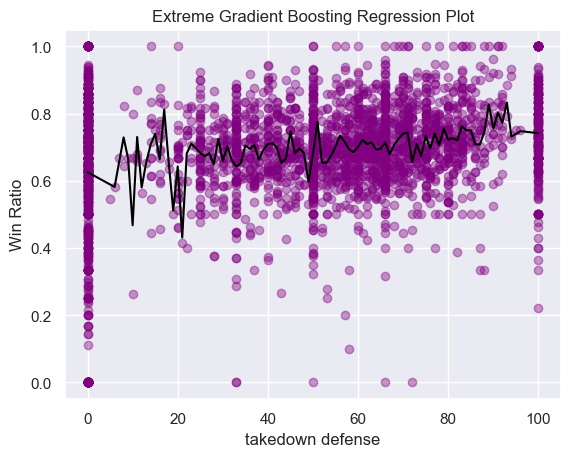

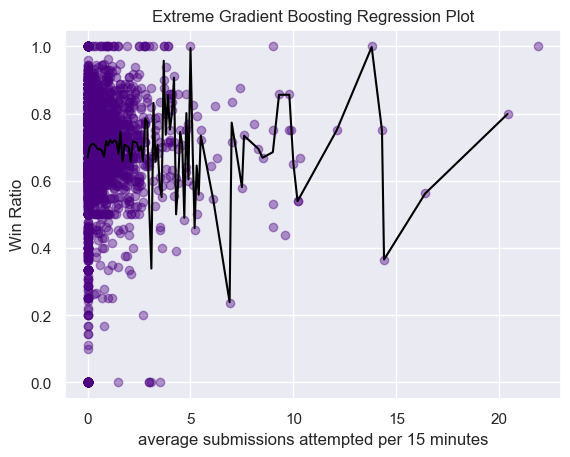

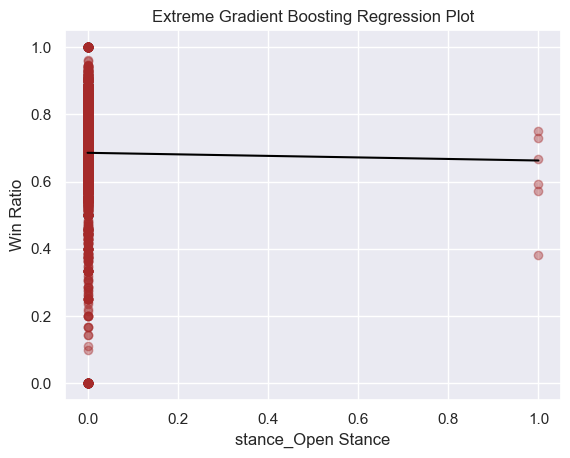

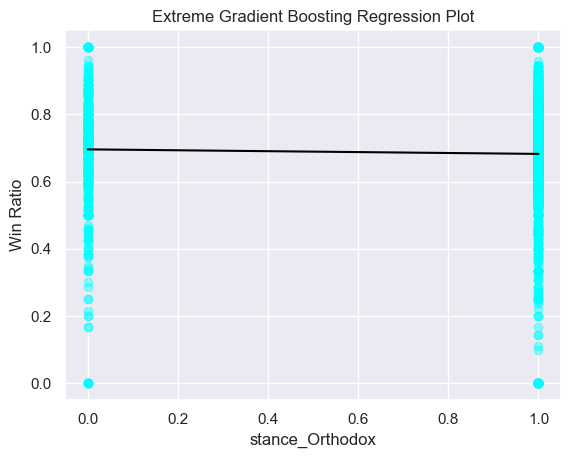

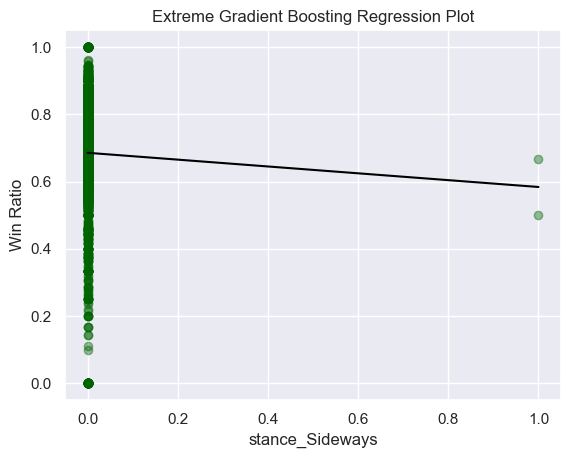

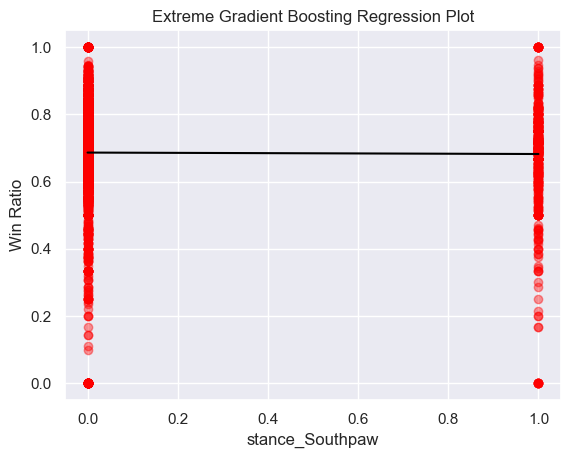

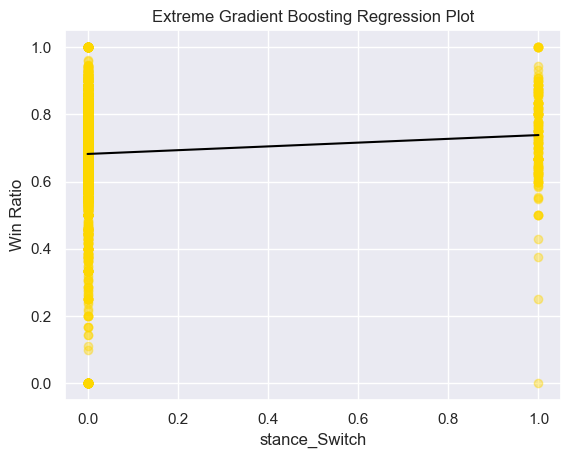

In [68]:
colors = ["steelblue", "deeppink", "orange", "lightgreen", "skyblue", "darkorange", "darkcyan", "darkblue", "green", "purple", "indigo", "brown", "cyan", "darkgreen", "red", "gold"]
for col, color in zip(x[selected_columns].columns, colors):
    s_arg = np.argsort(train_n1.loc[:, col].values, axis = 0)
    s_column = train_n1.loc[:, col].values[s_arg]
    sorted_train_y = train_m1.values[s_arg]
    xg_model.fit(s_column[:, np.newaxis], sorted_train_y)
    pred_y = xg_model.predict(s_column[:, np.newaxis])
    plt.scatter(x.loc[:, col], y, color = color, alpha = 0.4)
    plt.plot(s_column, pred_y, color = "black")
    plt.xlabel(str(col))
    plt.ylabel("Win Ratio")
    plt.title("Extreme Gradient Boosting Regression Plot")
    plt.show()

#### The above plots show a linear relationship between all type of stance and win ratio but they are not very strong. Rest of the plots show a non-linear and relatively complex relationship with fluctuations between other features and win ratio

In [69]:
result = pd.DataFrame({
    "Model": ["Random Forest Regression", "Linear Regression", "Support Vector Regression", 
              "Extreme Gradient Boosting Regression", "Polynomial Regression"],
    "MSE": [0.02143, 0.0220, 0.02176, 0.0232, None],
    "R-Score": [0.2966, 0.2733, 0.2563, 0.2364, None],
    "Conclusion": [None, "Model suggests Linear Regression is better", None, None, "Model suggests Linear Regression is better"]
})
result = result.set_index("Model")
result

MSE  R-Score  \
Model                                                    
Random Forest Regression              0.02143   0.2966   
Linear Regression                     0.02200   0.2733   
Support Vector Regression             0.02176   0.2563   
Extreme Gradient Boosting Regression  0.02320   0.2364   
Polynomial Regression                     NaN      NaN   

                                                                      Conclusion  
Model                                                                             
Random Forest Regression                                                    None  
Linear Regression                     Model suggests Linear Regression is better  
Support Vector Regression                                                   None  
Extreme Gradient Boosting Regression                                        None  
Polynomial Regression                 Model suggests Linear Regression is better

# <u>Final Conclusion</u>
##### 1.Random Forest Regression had the best performance with the lowest MSE (0.02143) and the highest R-squared (0.2966). This suggests that Random Forest Regression captured the variability in the data better than the other models.

##### 2. Linear Regression was slightly behind but still performed close to Random Forest Regression. Its simplicity and interpretability make it an alternative.

##### 3. Support Vector Regression and Extreme Gradient Boosting Regression had slightly higher MSE and lower R-squared values, indicating they may not be as well-suited for the dataset or the relationships between features and the target variable.

##### Random Forest Regression performed slightly better than Linear Regression because it can capture complex, non-linear relationships between features and the target variable. It builds multiple decision trees and combines their predictions, which helps it adapt to patterns in the data that Linear Regression which is a purely linear model and couldn't.

##### Other non-linear models like Support Vector Regression or Extreme Gradient Boosting Regression may not have performed well because they can overfit or require more precise parameter tuning. Random Forest Regression, being an ensemble method, is more robust and naturally resists overfitting by averaging multiple trees. This balance of flexibility and robustness gave it a slight edge..

### The current dataset provides valuable insights but lacks some critical columns that could improve the prediction accuracy. Key missing features include:

##### 1. Fighter Experience: Total fights, win streaks, fight frequency, and average fight duration.
##### 2. Training Details: Training hours, camp duration, and gym/training facility.
##### 3. Opponent Information: Opponent’s win ratio, reach, height, and rank.
##### 4. Physical Stats: Arm span, leg reach, and body fat percentage.
##### 5. Fight Context: Match importance, fight location, and weight class.
##### 6. Mental Factors: Mindset, confidence, and psychological state before fights.
##### 7. Body Condition: like Excellent, Good, Bad, previous injuries, and recovery.

# <u>Report</u> :

## Most Challenging Aspects:

##### 1. Feature Engineering: Deciding which columns to include and transform for prediction (e.g., using RFECV for feature selection) was challenging.

##### 2.Data Preprocessing: Handling missing data, scaling features, and ensuring consistency across different types of models (Linear Regression and Random Forest) were time-consuming and required multiple iterations.

## Strong Aspects of Your Analysis:

##### 1.Model Comparison: By comparing multiple regression models (Linear Regression, Support Vector Regression, Random Forest, Extreme Gradient Boosting Regression), you gained a comprehensive understanding of which model worked best for predicting the reach.

##### 2.Feature Selection: Using RFECV effectively helped in identifying the most important features, allowing for a more optimized model with fewer irrelevant features.

## Original and Creative Approach:

##### Visualization: The use of plots (e.g., feature vs. cross-validation score, learning curves) added a creative touch in visualizing model performance and feature selection.

## Weak Points:

##### Model Interpretation: With complex models like SVR and Random Forest, interpreting the model's predictions in a understandable way was difficult.

## Improvements for Further Elaboration:

##### 1.Hyperparameter Tuning: Further tuning of the models (e.g., using grid search or random search for SVR and Random Forest) could help improve accuracy.

##### 2.Advanced Feature Selection: Trying other feature selection techniques (e.g., Lasso, Ridge) and comparing their performance could give better results, especially with high-dimensional data.